# **Projeto da Disciplina**
## **Valida√ß√£o de modelos de clusteriza√ß√£o - 24E4_3**

------------------------------------

> Importa√ß√£o das bibliotecas necess√°rias para execu√ß√£o desse notebook

In [1]:
import sys
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from folium.plugins import HeatMap
import folium
from dtaidistance import dtw



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-3\Lib\site-packages\ipykern


# **Parte 1 - Infraestrutura**
## Para as quest√µes a seguir, voc√™ dever√° executar c√≥digos em um notebook Jupyter, rodando em ambiente local, certifique-se que:


### Quest√£o 1) Voc√™ est√° rodando em Python 3.9+

In [2]:
print("Resposta:")
print(f"Vers√£o do Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")


Resposta:
Vers√£o do Python: 3.12.4


### Quest√£o 2) Voc√™ est√° usando um ambiente virtual: Virtualenv ou Anaconda


In [3]:
print("Resposta:")
print(sys.version)

Resposta:
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


> **Evid√™ncias:**<br>
> Print Screen do ambiente Anaconda:<br>
> 1) Ambiente virtual no Visual Studio Code<br><br>
>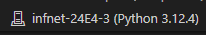<br>
>2) Ambiente virtual do Anaconda no Visual Studio Code<br><br>
>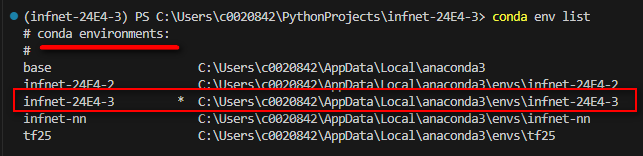<br>
>3) Ambiente Virtual do Anaconda Navigator<br><br>
>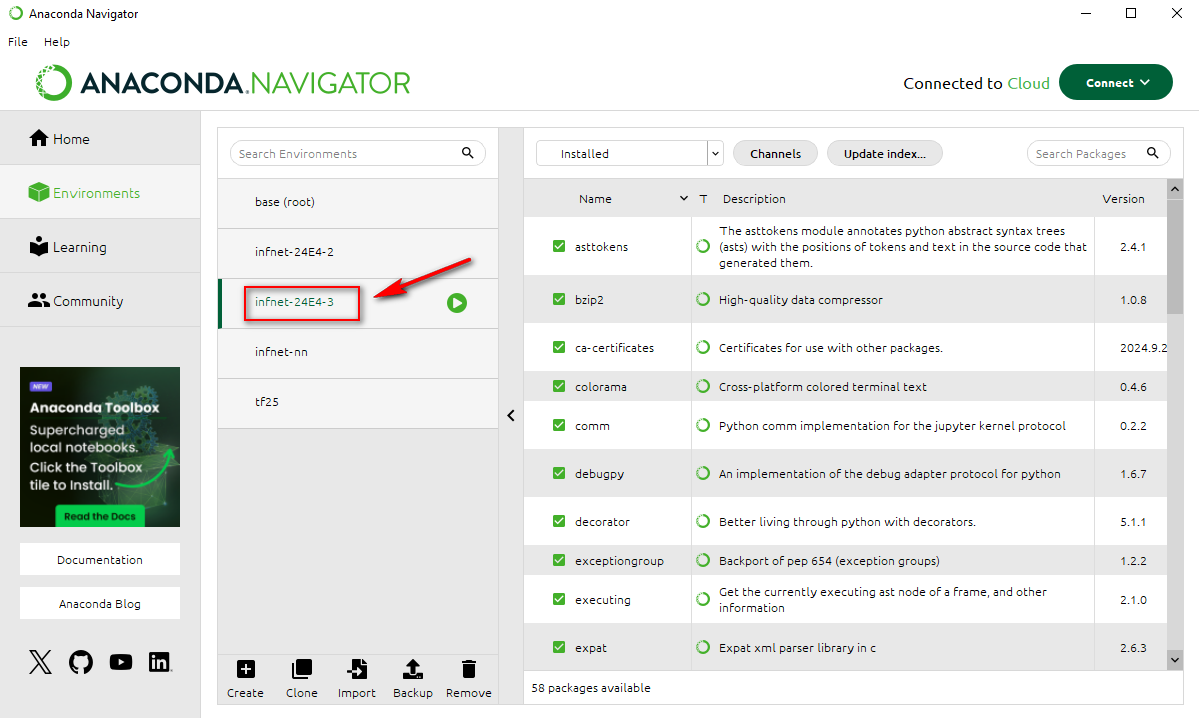

### Quest√£o 3) Todas as bibliotecas usadas nesse exerc√≠cios est√£o instaladas em um ambiente virtual espec√≠fico

In [4]:
installed_packages = subprocess.check_output(['conda', 'list']).decode()
print("Resposta:")
print("Lista de todas as bibliotecas instaladas no ambiente Anaconda para execu√ß√£o desse notebook:")
print(installed_packages)

Resposta:
Lista de todas as bibliotecas instaladas no ambiente Anaconda para execu√ß√£o desse notebook:
# packages in environment at C:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-3:
#
# Name                    Version                   Build  Channel
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
branca                    0.8.0                    pypi_0    pypi
bzip2                     1.0.8                h2bbff1b_6  
ca-certificates           2024.9.24            haa95532_0  
certifi                   2024.8.30                pypi_0    pypi
chardet                   5.2.0                    pypi_0    pypi
charset-normalizer        3.4.0                    pypi_0    pypi
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
comm                      0.2.2              pyhd8ed1ab_0    conda-forge
contourpy                 1.3.1                    pypi_0    pypi
cycler                    0.12.1                   pypi_0    pypi
d

### Quest√£o 4) Gere um arquivo de requerimentos (requirements.txt) com os pacotes necess√°rios. <br>√â necess√°rio se certificar que a vers√£o do pacote est√° disponibilizada.

> Resposta:
> - Foi gerado um arquivo *‚Äúrequirements.txt‚Äù* com todos os pacotes necess√°rios e suas respectivas vers√µes.
> <br>https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS/blob/main/requirements.txt
> - Tamb√©m foi gerado o arquivo *‚Äúenvironment.yml‚Äù* que √© espec√≠fico para o ambiente virtual Anaconda, utilizado neste notebook. 
> <br>https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS/blob/main/environment.yml
>
> Comandos utilizados para gera√ß√£o dos arquivos:
> - *pip freeze > requirements.txt*
> - *conda env export > environment.yml*

### Quest√£o 5) Tire um printscreen do ambiente que ser√° usado rodando em sua m√°quina.

> Resposta: <br>
> Print Screen da m√°quina com o ambiente Anaconda iniciado no Visual Studio Code.
> <br><br>
> 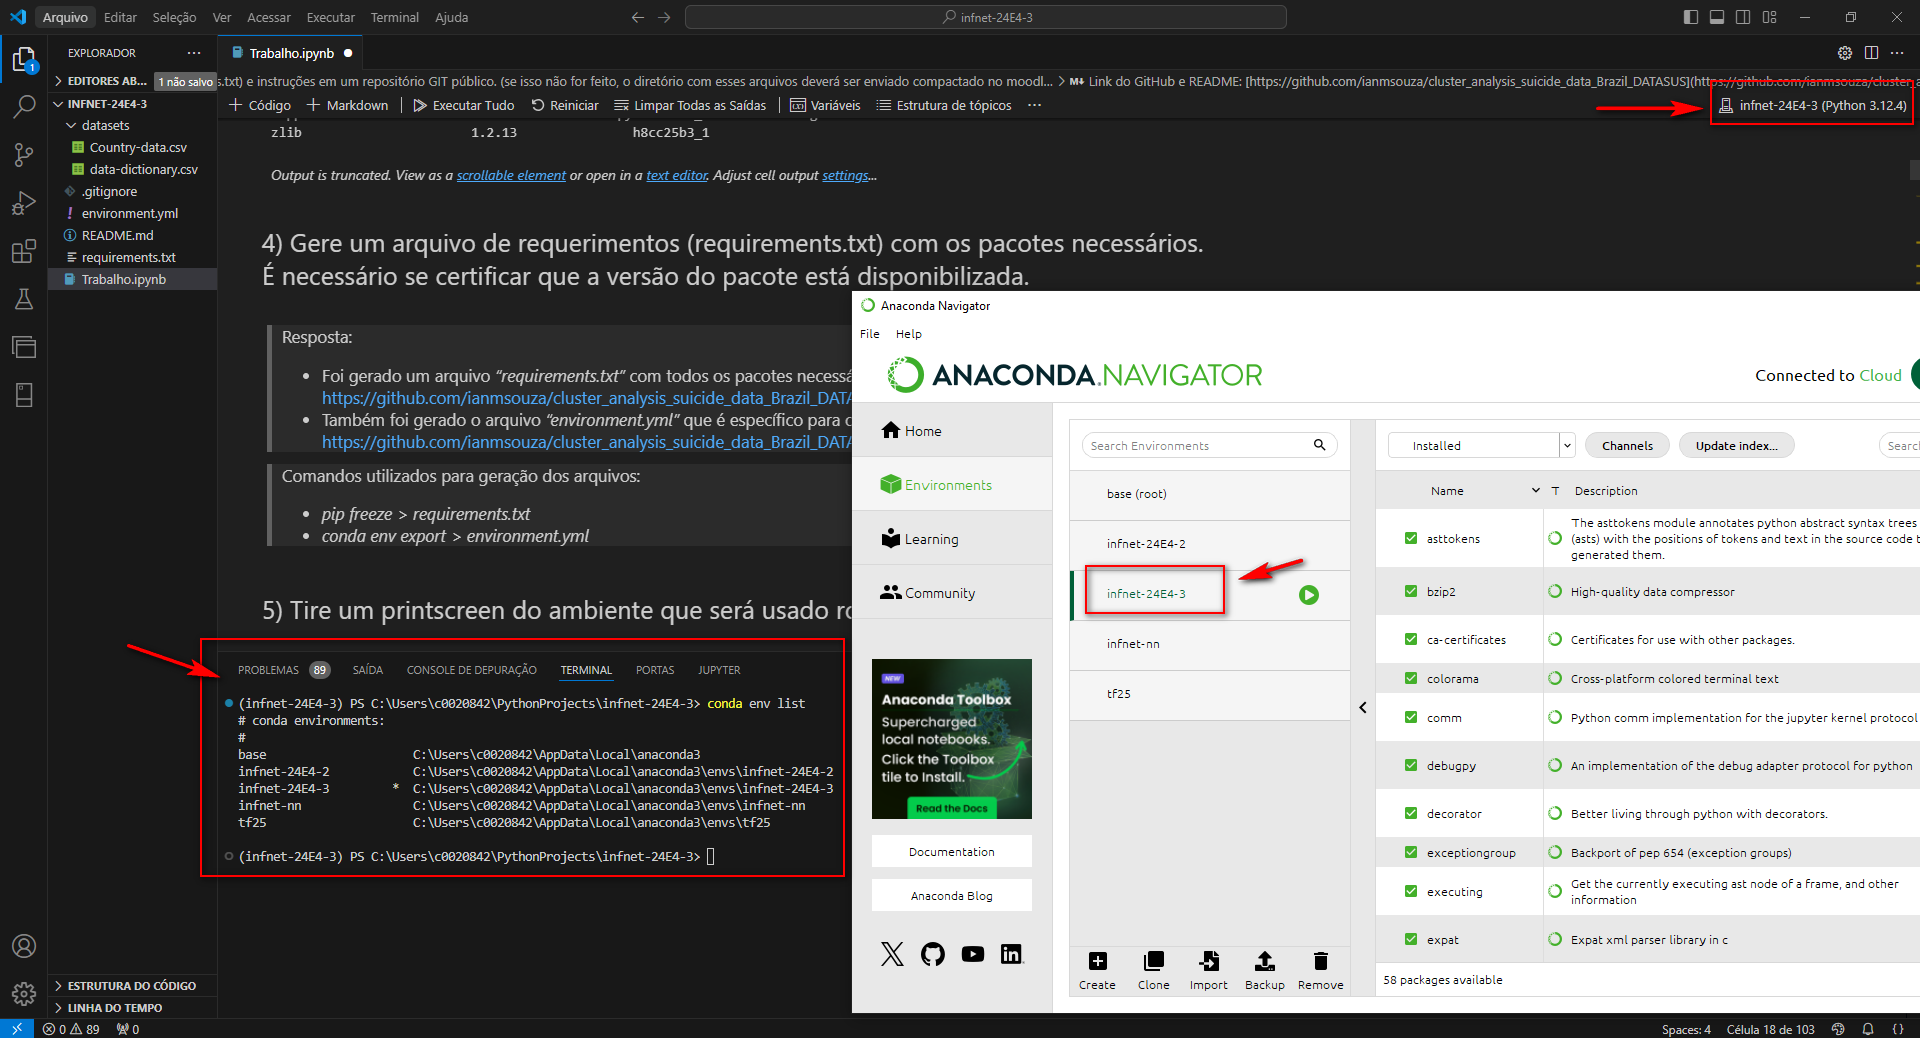

### Quest√£o 6) Disponibilize os c√≥digos gerados, assim como os artefatos acess√≥rios (requirements.txt) e instru√ß√µes em um reposit√≥rio GIT p√∫blico. (se isso n√£o for feito, o diret√≥rio com esses arquivos dever√° ser enviado compactado no moodle).

> Resposta:
>
> Link do GitHub e README: [https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS](https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS)
> <br><br>
> 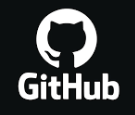

# **Parte 2 - Escolha de base de dados**
## Para as quest√µes a seguir, usaremos uma base de dados e faremos a an√°lise explorat√≥ria dos dados, antes da clusteriza√ß√£o.

### Quest√£o 1) Escolha uma base de dados para realizar o trabalho. Essa base ser√° usada em um problema de clusteriza√ß√£o.

> Resposta:<br>
>
> **Dados de Suic√≠dio no Brasil 2014 a 2018**<br>
> **Fonte:** Kaggle<br>
> https://www.kaggle.com/datasets/psicodata/dados-de-suicdio-no-brasil-2014-a-2018<br>
> Esses dados foram baixados do DATASUS e processados utilizando rotinas da linguagem Python.
>
><br><br>
> **Mais detalhes de como os dados originais foram processados antes de ser publicado no Kaggle**
>
> O processo de como os dados foram processados podem ser consultado nesses artigo e c√≥digo Google Colab: 
> - https://medium.com/psicodata/baixando-e-processando-dados-do-datasus-sobre-suic%C3%ADdio-com-python-656afa17f6ad
> - https://medium.com/datapsico/download-e-pr%C3%A9-processamento-de-dados-do-sinan-datasus-sobre-viol%C3%AAncia-com-python-ddf46ff9a3f5
> - https://colab.research.google.com/drive/1xOFXO8ccaBUCWrH11tqiJFCvp1ipgcHU#scrollTo=zyq6FWmypxst
> 
> Foram considerados casos de suic√≠dio causas b√°sicas de morte CID-10 X60 a X84

> Importa√ß√£o da base de  dados oriundos do Kaggle:

In [5]:
# Carregando os dados
df = pd.read_csv(r'C:\Users\c0020842\PythonProjects\infnet-24E4-3\datasets\datasus_suicidio_2014_2018.csv', encoding='ISO-8859-1')

# Renomear as colunas conforme o novo padr√£o
df.columns = ['uf', 'ano', 'circunstancia_obito', 'data_obito', 'data_nascimento', 'genero', 'raca_cor', 'estado_civil', 'escolaridade', 
              'ocupacao', 'municipio', 'local_obito', 'assistencia_medica', 'causa_basica_obito', 'causa_basica_obito_0', 'idade', 'mes']


> Quantidade de linhas e colunas no dataset

In [6]:
df.shape

(58634, 17)

> Amostra dos dados presentes no dataset

In [7]:
df

uf   ano circunstancia_obito data_obito data_nascimento     genero  \
0      AC  2014            Suic√≠dio   02-01-14        02-07-77  Masculino   
1      AC  2014            Suic√≠dio   23-01-14        30-07-66  Masculino   
2      AC  2014            Suic√≠dio   31-01-14        28-07-43  Masculino   
3      AC  2014            Suic√≠dio   05-02-14        04-07-99  Masculino   
4      AC  2014            Suic√≠dio   06-02-14        02-05-72  Masculino   
...    ..   ...                 ...        ...             ...        ...   
58629  TO  2018            Suic√≠dio   16-04-18        17-11-89  Masculino   
58630  TO  2018            Suic√≠dio   14-05-18        03-07-90   Feminino   
58631  TO  2018            Suic√≠dio   15-05-18        08-08-55   Feminino   
58632  TO  2018            Suic√≠dio   24-07-18        27-06-01  Masculino   
58633  TO  2018            Suic√≠dio   28-12-18        17-07-76  Masculino   

      raca_cor      estado_civil escolaridade  \
0        Preta            Casado   4 a 7 anos   
1       Branca  Uni√£o consensual    12 e mais   
2       Branca               NaN          NaN   
3       Branca          Solteiro   4 a 7 anos   
4       Branca               NaN          NaN   
...        ...               ...          ...   
58629   Branca          Solteiro  8 a 11 anos   
58630    Parda  Uni√£o consensual          NaN   
58631    Parda             Vi√∫vo      Nenhuma   
58632    Parda          Solteiro  8 a 11 anos   
58633    Preta  Uni√£o consensual      Nenhuma   

                              ocupacao       municipio local_obito  \
0       ATLETA PROFISSIONAL DE FUTEBOL      Rio Branco   Domic√≠lio   
1      MEDICO GINECOLOGISTA E OBSTETRA      Rio Branco   Domic√≠lio   
2                                    0      Rio Branco   Domic√≠lio   
3                            ESTUDANTE  Epitaciol√¢ndia      Outros   
4                                    0      Rio Branco      Outros   
...                                ...             ...         ...   
58629            DESEMPREGADO CRONICO           Palmas   Domic√≠lio   
58630                        ESTUDANTE          Palmas   Domic√≠lio   
58631                     DONA DE CASA          Palmas    Hospital   
58632                        ESTUDANTE       Aragua√≠na      Outros   
58633                                0      Natividade   Domic√≠lio   

      assistencia_medica causa_basica_obito causa_basica_obito_0  idade  mes  
0                    N√£o               X700                 X700   37.0    1  
1                    N√£o               X800                 X800   48.0    1  
2                    N√£o               X700                 X700   71.0    1  
3                    N√£o               X700                 X700   15.0    2  
4                    N√£o               X700                 X700   42.0    2  
...                  ...                ...                  ...    ...  ...  
58629                N√£o               X780                 X780   29.0    4  
58630                N√£o               X610                 X840   28.0    5  
58631                Sim               X699                  R99   63.0    5  
58632                N√£o               X700                 X700   17.0    7  
58633                N√£o               X700                 X700   42.0   12  

[58634 rows x 17 columns]

> Informa√ß√µes detalhadas de cada coluna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uf                    58634 non-null  object 
 1   ano                   58634 non-null  int64  
 2   circunstancia_obito   56606 non-null  object 
 3   data_obito            58634 non-null  object 
 4   data_nascimento       58407 non-null  object 
 5   genero                58619 non-null  object 
 6   raca_cor              57298 non-null  object 
 7   estado_civil          54305 non-null  object 
 8   escolaridade          45162 non-null  object 
 9   ocupacao              58634 non-null  object 
 10  municipio             58634 non-null  object 
 11  local_obito           58463 non-null  object 
 12  assistencia_medica    40872 non-null  object 
 13  causa_basica_obito    58634 non-null  object 
 14  causa_basica_obito_0  58544 non-null  object 
 15  idade              

> Vari√°veis do dataset
>
> Observe que as vari√°veis foram renomeadas para melhor compreens√£o.

| N¬∫  | Vari√°vel       | Vari√°vel renomeada    | Descri√ß√£o                                | Valores |
|-----|----------------|-----------------------|------------------------------------------|---------|
| 1   | level_0        | uf                   | UF do caso registrado                   | √çndices resetados |
| 2   | level_1        | ano                  | Ano do caso registrado                  | √çndices resetados |
| 3   | CIRCOBITO      | circunstancia_obito  | Circunst√¢ncia do √≥bito                  | 1: Acidente, 2: Suic√≠dio, 3: Homic√≠dio, 4: Outro, 0;5;6;7;8;9: NA |
| 4   | DTOBITO        | data_obito           | Data do √≥bito                           | - |
| 5   | DTNASC         | data_nascimento      | Data de nascimento                      | - |
| 6   | SEXO           | genero               | Sexo                                    | 1: Masculino, 2: Feminino, 0;9: NA |
| 7   | RACACOR        | raca_cor             | Ra√ßa                                    | 1: Branca, 2: Preta, 3: Amarela, 4: Parda, 5: Ind√≠gena, 0;6;7;8;9: NA |
| 8   | ESTCIV         | estado_civil         | Estado civil                            | 1: Solteiro, 2: Casado, 3: Vi√∫vo, 4: Separado judicialmente, 5: Uni√£o consensual, 0;6;7;8;9: NA |
| 9   | ESC            | escolaridade         | Escolaridade                            | 1: Nenhuma, 2: 1 a 3 anos, 3: 4 a 7 anos, 4: 8 a 11 anos, 5: 12 e mais, 8: De 9 a 11 anos, 0;6;7;9;A: NA |
| 10  | OCUP           | ocupacao             | Ocupa√ß√£o                                | Tabela CBO2002 (a partir de 2006) |
| 11  | CODMUNRES      | municipio            | Munic√≠pio de resid√™ncia do falecido     | C√≥digo |
| 12  | LOCOCOR        | local_obito          | Local de ocorr√™ncia do √≥bito            | 1: Hospital, 2: Outro estabelecimento de sa√∫de, 3: Domic√≠lio, 4: Via p√∫blica, 5: Outros, 9: NA |
| 13  | ASSISTMED      | assistencia_medica   | Assist√™ncia m√©dica                      | 1: Sim, 2: N√£o, 9: NA |
| 14  | CAUSABAS       | causa_basica_obito   | Causa b√°sica do √≥bito                   | C√≥digo CID-10 |
| 15  | CAUSABAS_O     | causa_basica_obito_0 | Causa b√°sica do √≥bito (outro formato)   | C√≥digo CID-10 |
| 16  | idade          | idade                | Idade do falecido                       | Vari√°vel adicional |
| 17  | mes            | mes                  | M√™s do √≥bito                            | Vari√°vel adicional |


### Quest√£o 2) Escreva a justificativa para a escolha de dados, dando sua motiva√ß√£o e objetivos.

> Resposta:<br>
>
> A base de dados sobre suic√≠dios no Brasil, referente ao per√≠odo de 2014 a 2018, foi selecionada por sua relev√¢ncia social e potencial para an√°lises multidimensionais. O suic√≠dio √© uma quest√£o de sa√∫de p√∫blica complexa, envolvendo fatores culturais, socioecon√¥micos, regionais e demogr√°ficos. Analisar esses dados pode trazer insights significativos para compreender e combater esse problema tanto no Brasil quanto em escala global.
>
> A escolha foi motivada pelos seguintes aspectos:
>
> - **Compreens√£o de padr√µes regionais:** Identificar estados ou regi√µes com taxas mais altas ou mais baixas de suic√≠dios, permitindo um entendimento das disparidades regionais.
>
> - **Explora√ß√£o de fatores associados:** Avaliar como vari√°veis como g√™nero, faixa et√°ria, n√∫mero de suic√≠dios e fatores socioecon√¥micos influenciam o comportamento de risco.
>
> - **Subs√≠dio para pol√≠ticas p√∫blicas:** Gerar informa√ß√µes que possam fundamentar estrat√©gias preventivas mais eficazes, com foco em √°reas priorit√°rias identificadas pelos padr√µes encontrados.
>
> Essa base de dados proporciona uma oportunidade √∫nica para abordar um tema de grande impacto social, contribuindo para a formula√ß√£o de a√ß√µes e pol√≠ticas p√∫blicas que visem √† redu√ß√£o das taxas de suic√≠dio e ao suporte a popula√ß√µes vulner√°veis.

### Quest√£o 3) Mostre atrav√©s de gr√°ficos a faixa din√¢mica das vari√°veis que ser√£o usadas nas tarefas de clusteriza√ß√£o. <br>Analise os resultados mostrados. <br>O que deve ser feito com os dados antes da etapa de clusteriza√ß√£o?

> Resposta:
>
> As vari√°veis num√©rica que podem ser usada para clusteriza√ß√£o s√£o as vari√°veis 'idade', 'ano' e 'mes'.<br>
> Por√©m, existem vari√°veis categ√≥ricas que ser√£o convertidas nas quest√µes posteriores. 
>
> **Faixa din√¢mica das vari√°veis do dataset**

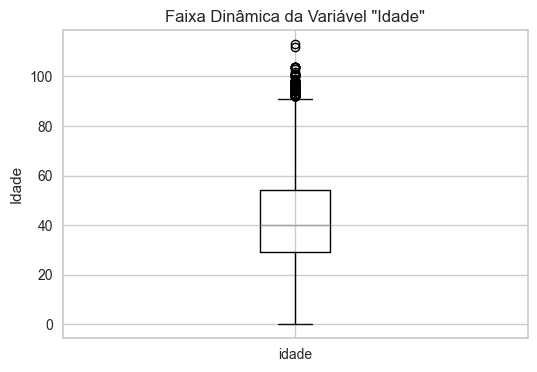

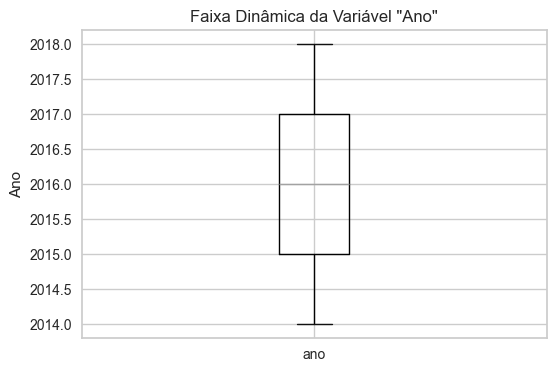

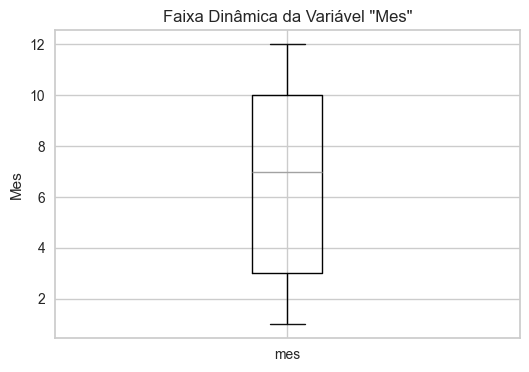

In [9]:
numerical_columns = ['idade', 'ano', 'mes']

# Plotar gr√°ficos para visualiza√ß√£o das faixas din√¢micas
for column in numerical_columns:
    plt.figure(figsize=(6, 4))  # Tamanho ajustado para cada gr√°fico
    df.boxplot(column=column)  # Plotar o boxplot para cada vari√°vel
    plt.title(f'Faixa Din√¢mica da Vari√°vel "{column.capitalize()}"')  # T√≠tulo din√¢mico com nome da vari√°vel
    plt.ylabel(column.capitalize())  # Eixo Y din√¢mico
    plt.show()

> **An√°lise da Faixa Din√¢mica das Vari√°veis**
>
> **Vari√°vel "Idade":**
> <br>
> A faixa din√¢mica da vari√°vel "Idade" foi exibida no gr√°fico correspondente.
> <br>Podemos ver os valores variando em uma faixa ampla, incluindo alguns outliers.
> <br>Para a clusteriza√ß√£o, √© importante garantir que as vari√°veis estejam bem distribu√≠das e dentro de uma escala semelhante, para evitar que vari√°veis com grandes valores num√©ricos dominem o processo.
> <br><br>
> **An√°lise Estat√≠stica da Vari√°vel "Idade":**
> <br>
> 1. **M√≠nimo (idade m√≠nima registrada):**
> <br>O menor valor observado no gr√°fico √© 0 anos.
>
> 2. **M√°ximo (idade m√°xima registrada):**
> <br>O maior valor registrado no boxplot, excluindo outliers, est√° em torno de 100 anos. Os outliers ultrapassam este valor, atingindo cerca de 110 anos.
>
> 3. **Mediana (valor central):**
> <br>A mediana da idade, representada pela linha dentro da caixa do boxplot, est√° pr√≥xima de 40 anos, indicando que metade dos registros tem idade menor ou igual a 40 anos.
>
> 4. **Intervalo Interquartil (IQR):**
> <br>O intervalo interquartil, que corresponde √† diferen√ßa entre o 3¬∫ quartil (75%) e o 1¬∫ quartil (25%), varia aproximadamente entre 30 anos e 55 anos. Este intervalo cont√©m os valores t√≠picos de idade sem considerar outliers.
>
> 5. **Outliers:**
> <br>Os valores acima do limite superior (cerca de 100 anos) s√£o considerados outliers. Isso reflete registros com idade at√≠pica, que podem ser reais ou erros nos dados.
> <br><br>
>
> **Vari√°vel "Ano":**
> <br>
> A faixa din√¢mica da vari√°vel "Ano" foi exibida no gr√°fico correspondente.
> <br>Essa vari√°vel apresenta valores discretos, e sua distribui√ß√£o √© importante para entender como os anos impactam os dados analisados.
> <br><br>
> **An√°lise Estat√≠stica da Vari√°vel "Ano":**
> <br>
> 1. **M√≠nimo (ano m√≠nimo registrado):**
> <br>O menor valor observado no gr√°fico √© 2014.
>
> 2. **M√°ximo (ano m√°ximo registrado):**
> <br>O maior valor registrado no boxplot est√° em 2018.
>
> 3. **Mediana (valor central):**
> <br>A mediana da vari√°vel "Ano", representada pela linha dentro da caixa do boxplot, est√° em 2016.
>
> 4. **Intervalo Interquartil (IQR):**
> <br>O intervalo interquartil varia entre 2015 e 2017. Este intervalo cont√©m os valores t√≠picos de ano sem considerar poss√≠veis outliers.
>
> 5. **Outliers:**
> <br>N√£o h√° outliers evidentes na vari√°vel "Ano", pois os dados est√£o bem ajustados dentro dos limites.
> <br><br>
>
> **Vari√°vel "M√™s":**
> <br>
> A faixa din√¢mica da vari√°vel "M√™s" tamb√©m foi exibida no gr√°fico correspondente.
> <br>Essa vari√°vel apresenta valores que variam de forma sazonal, o que pode ser √∫til em an√°lises temporais.
> <br><br>
> **An√°lise Estat√≠stica da Vari√°vel "M√™s":**
> <br>
> 1. **M√≠nimo (m√™s m√≠nimo registrado):**
> <br>O menor valor observado no gr√°fico √© 1 (Janeiro).
>
> 2. **M√°ximo (m√™s m√°ximo registrado):**
> <br>O maior valor registrado no boxplot est√° em 12 (Dezembro).
>
> 3. **Mediana (valor central):**
> <br>A mediana da vari√°vel "M√™s", representada pela linha dentro da caixa do boxplot, est√° em 8 (Agosto).
>
> 4. **Intervalo Interquartil (IQR):**
> <br>O intervalo interquartil varia entre 4 (Abril) e 10 (Outubro). Este intervalo cont√©m os valores t√≠picos de m√™s sem considerar poss√≠veis outliers.
>
> 5. **Outliers:**
> <br>N√£o h√° outliers evidentes na vari√°vel "M√™s", indicando que os dados est√£o distribu√≠dos de maneira uniforme dentro dos limites observados.


> **O que deve ser feito com os dados do dataset antes da etapa de clusteriza√ß√£o:**
> 1. **Tratamento de valores ausentes:** Se existirem valores ausentes nas vari√°veis num√©ricas ou categ√≥ricas, eles devem ser tratados, seja com a imputa√ß√£o de valores ou remo√ß√£o das linhas/colunas correspondentes.
>
> 2. **Escalonamento de vari√°veis:** As vari√°veis "Idade", "Ano" e "M√™s" possuem escalas diferentes, o que pode impactar a clusteriza√ß√£o. √â necess√°rio normalizar ou padronizar essas vari√°veis para que todas tenham a mesma influ√™ncia no modelo.
>
> 3. **Convers√£o de vari√°veis categ√≥ricas:** Vari√°veis como "genero", "raca_cor", "estado_civil", "escolaridade", "ocupacao", "local_obito", "assistencia_medica", "causa_basica_obito", etc., precisam ser codificadas numericamente, por meio de t√©cnicas como one-hot encoding ou label encoding, conforme necess√°rio.
‚Äã

> **Observa√ß√£o:** O pr√©-processamento dos dados e a convers√£o das vari√°veis carteg√≥ricas ser√£o realizadas na quest√£o a seguir.

> **An√°lise explorat√≥ria**

In [10]:
df_suicidio = df.copy()

> **Gr√°fico da distribui√ß√£o de suic√≠dios por estado**
>
> Os estados de S√£o Paulo, Minas Gerais e Rio Grande do Sul possuem os maiores n√∫meros de suic√≠dios registrados. Estados menos populosos, como Acre e Roraima, apresentam os menores n√∫meros. Isso pode estar relacionado √† densidade populacional e fatores socioecon√¥micos regionais.

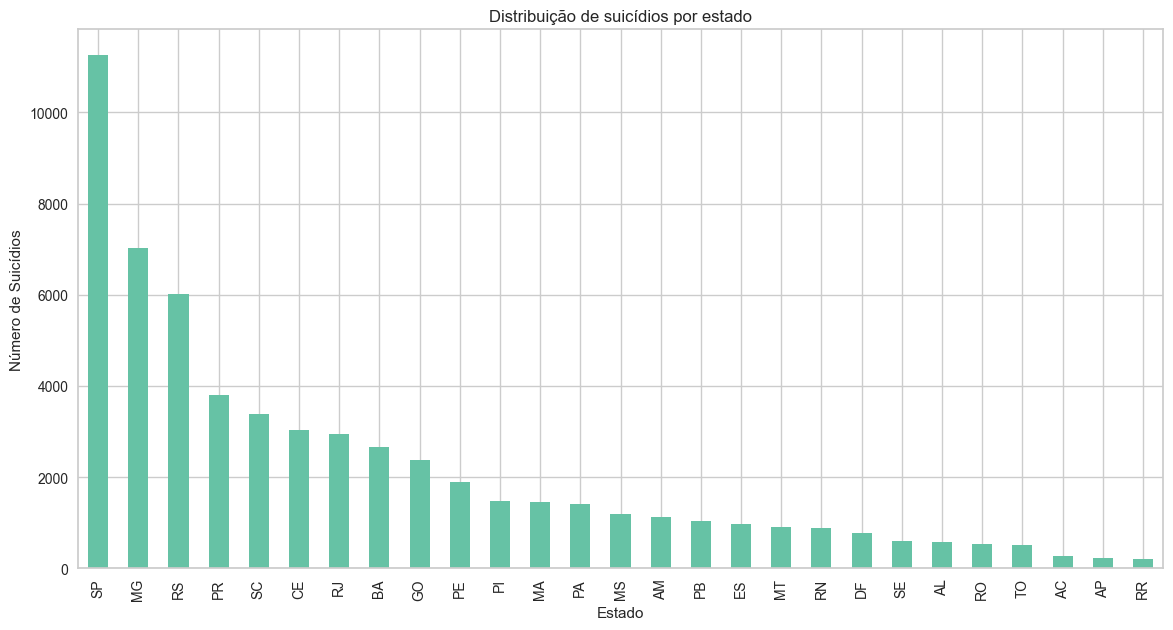

Estado com maior n√∫mero de suic√≠dios: SP


In [11]:
# Criar figura para a distribui√ß√£o de suic√≠dios por estado
plt.figure(figsize=(14, 7))
plt.title('Distribui√ß√£o de suic√≠dios por estado')

# Criar gr√°fico de barras com a contagem de ocorr√™ncias na coluna 'uf'
df_suicidio['uf'].value_counts().plot(kind='bar', colormap='Set2')

# Adicionar r√≥tulos aos eixos
plt.xlabel('Estado')
plt.ylabel('N√∫mero de Suic√≠dios')

# Exibir o gr√°fico
plt.show()

# Calcular e exibir o estado com maior n√∫mero de casos
estado_mais_casos = df_suicidio['uf'].value_counts().idxmax()
print(f"Estado com maior n√∫mero de suic√≠dios: {estado_mais_casos}")


In [12]:
# Dados de coordenadas m√©dias dos estados brasileiros
coordenadas_estados = {
    "AC": [-9.97499, -67.8243],
    "AL": [-9.5713, -36.7820],
    "AP": [1.3835, -51.8727],
    "AM": [-3.4168, -65.8561],
    "BA": [-12.5797, -41.7007],
    "CE": [-5.4984, -39.3206],
    "DF": [-15.8267, -47.9218],
    "ES": [-19.1836, -40.3089],
    "GO": [-15.8270, -49.8362],
    "MA": [-5.4026, -45.5507],
    "MT": [-12.6819, -56.9211],
    "MS": [-20.7722, -54.7852],
    "MG": [-18.5122, -44.5550],
    "PA": [-3.9656, -54.9749],
    "PB": [-7.2400, -36.7820],
    "PR": [-25.2521, -52.0215],
    "PE": [-8.8137, -36.9541],
    "PI": [-6.3310, -42.6955],
    "RJ": [-22.2753, -42.4190],
    "RN": [-5.7945, -36.9541],
    "RS": [-30.0346, -51.2177],
    "RO": [-10.9357, -62.8278],
    "RR": [1.8898, -61.2220],
    "SC": [-27.2423, -50.2189],
    "SP": [-23.5505, -46.6333],
    "SE": [-10.5741, -37.3857],
    "TO": [-10.1753, -48.2982]
}

# Agrupando os dados por estado
contagem_por_estado = df_suicidio['uf'].value_counts()

# Criar lista de pontos para o heatmap (coordenadas + intensidade)
dados_heatmap = [
    [coordenadas_estados[estado][0], coordenadas_estados[estado][1], contagem]
    for estado, contagem in contagem_por_estado.items()
]

# Criar o mapa
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar o heatmap ao mapa
HeatMap(dados_heatmap).add_to(mapa)

# Salvar o mapa como arquivo HTML
mapa.save("heatmap_suicidios_brasil.html")

> Heatmap de suicidios no Brasil

> 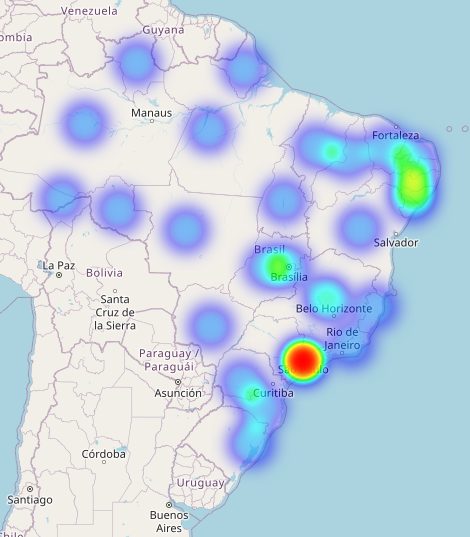

> **Gr√°fico da m√©dia de idade dos casos de suic√≠dio**
>
> A faixa et√°ria entre 30 e 50 anos tem a maior frequ√™ncia de suic√≠dios. Este padr√£o reflete uma concentra√ß√£o em idades produtivas, possivelmente associada a estresse, dificuldades econ√¥micas e outras press√µes.

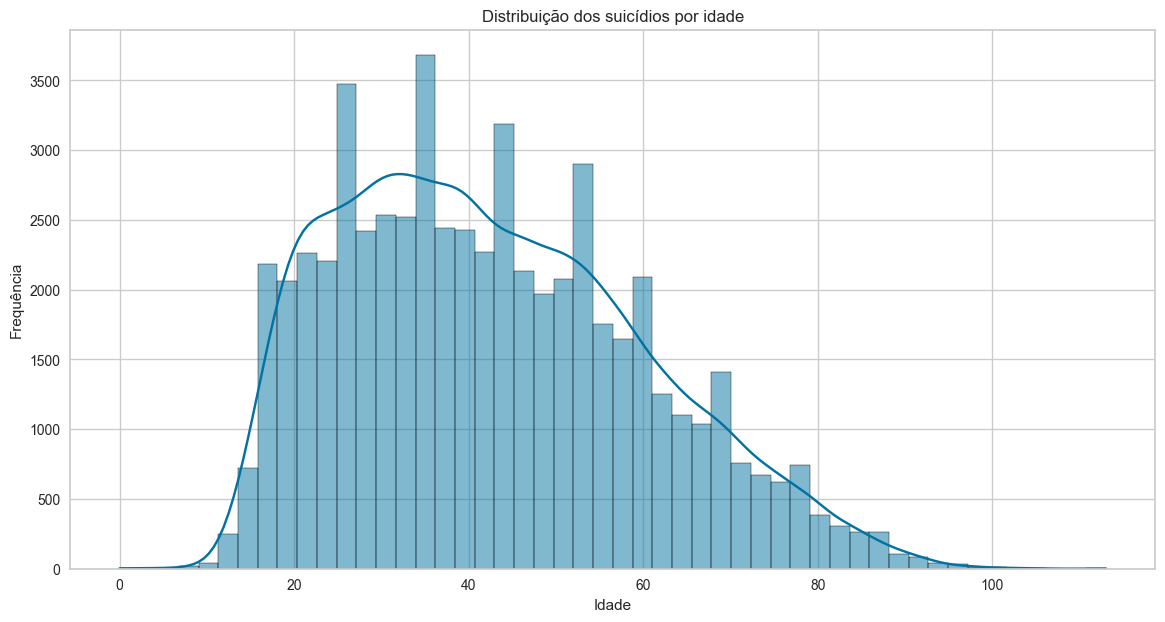

M√©dia de idade dos casos de suic√≠dio: 42.543308165117196


In [13]:
# Criar figura para a distribui√ß√£o de suic√≠dios por idade
plt.figure(figsize=(14, 7))
plt.title('Distribui√ß√£o dos suic√≠dios por idade')

# Criar histograma com a coluna 'idade'
sns.histplot(data=df_suicidio['idade'], kde=True, bins=50)

# Exibir o gr√°fico
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.show()

# Calcular e exibir a m√©dia da idade
idade_media = df_suicidio['idade'].mean()
print(f"M√©dia de idade dos casos de suic√≠dio: {idade_media}")


> **Gr√°fico da distribui√ß√£o dos suic√≠dios por idade e sexo**
>
> Homens apresentam maior densidade em quase todas as idades, especialmente entre 20 e 50 anos, enquanto mulheres mostram uma densidade mais baixa. Isso reflete um padr√£o mundial onde os homens est√£o mais associados a comportamentos de risco.

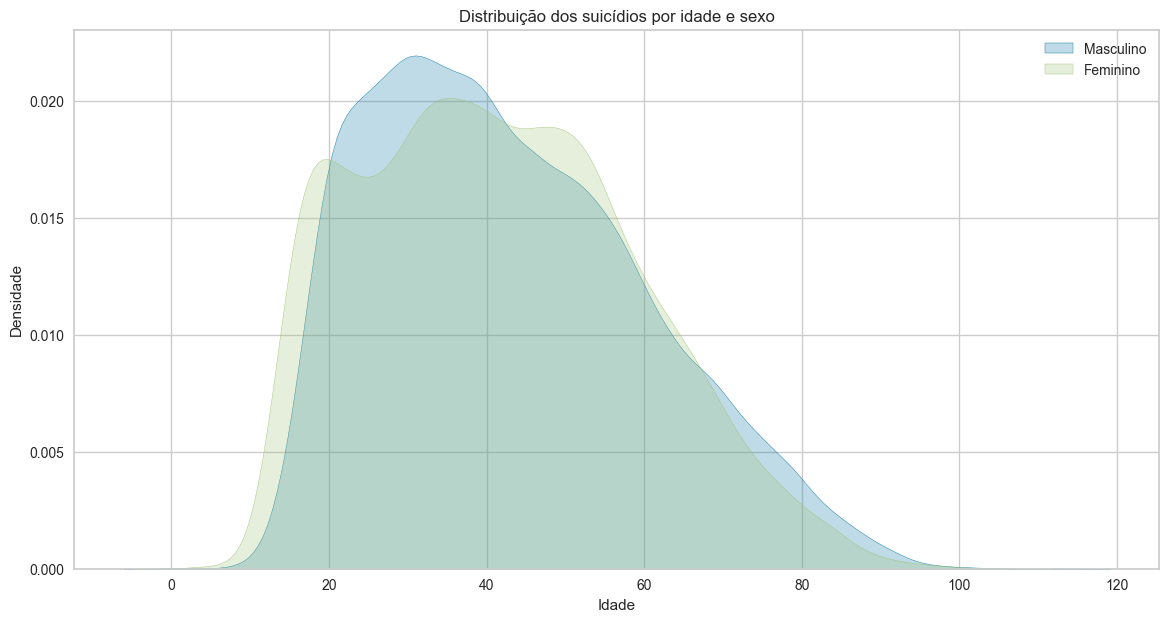

In [14]:
# Criar figura para a distribui√ß√£o de suic√≠dios por idade e g√™nero
plt.figure(figsize=(14, 7))
plt.title('Distribui√ß√£o dos suic√≠dios por idade e sexo')

# Filtrar os dados para g√™nero masculino e feminino
df_suicidio_m = df_suicidio.loc[df_suicidio['genero'] == 'Masculino']
df_suicidio_f = df_suicidio.loc[df_suicidio['genero'] == 'Feminino']

# Plotar a densidade de idade para masculino
sns.kdeplot(data=df_suicidio_m['idade'], fill=True, label='Masculino')

# Plotar a densidade de idade para feminino
sns.kdeplot(data=df_suicidio_f['idade'], fill=True, label='Feminino')

# Adicionar legenda e r√≥tulos
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()
plt.show()


> **Gr√°fico de suic√≠dios por sexo**
>
> O n√∫mero de suic√≠dios √© substancialmente maior entre homens, refor√ßando um padr√£o j√° conhecido e frequentemente atribu√≠do a m√©todos mais letais escolhidos por eles.

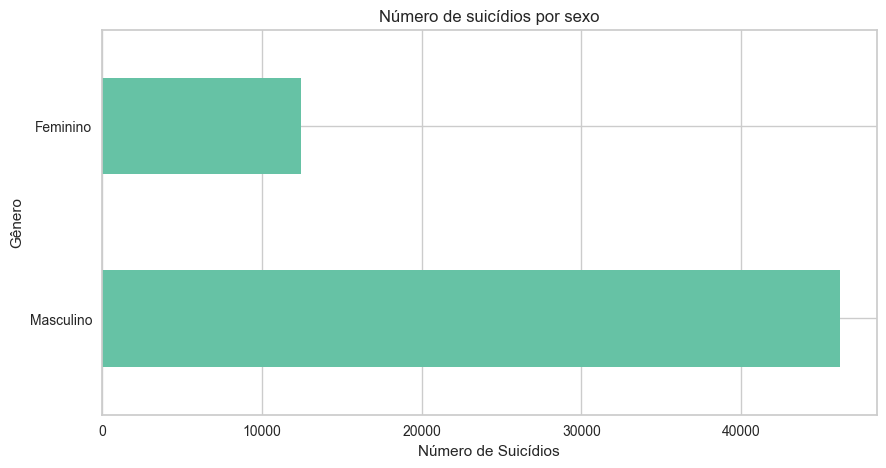

In [15]:
# Criar gr√°fico de barras horizontais para o n√∫mero de suic√≠dios por g√™nero
df_suicidio['genero'].value_counts().plot(kind='barh', figsize=(10, 5), colormap='Set2', 
                                          title='N√∫mero de suic√≠dios por sexo')

# Exibir o gr√°fico
plt.xlabel('N√∫mero de Suic√≠dios')
plt.ylabel('G√™nero')
plt.show()


> **Gr√°fico de suic√≠dios por estado civil**
>
> Pessoas solteiras correspondem √† maior parcela, seguidas por casados. A separa√ß√£o e a viuvez tamb√©m est√£o associadas, mas em menor escala.

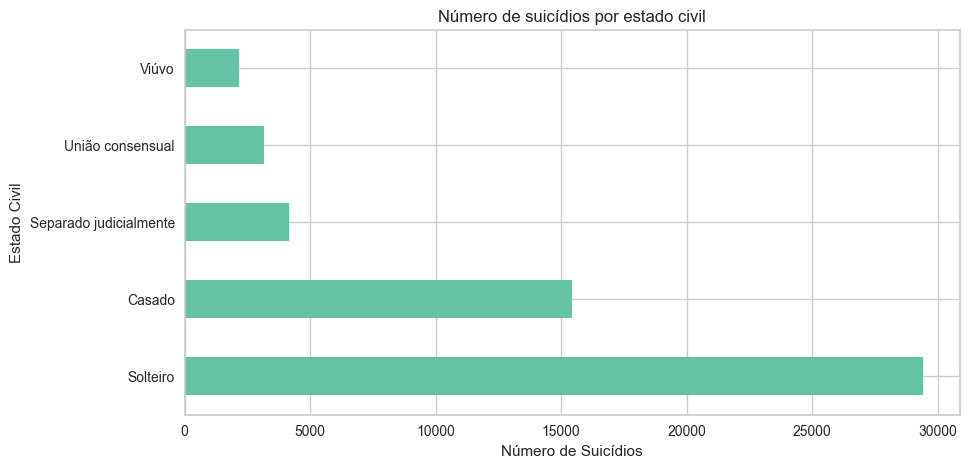

In [16]:
# Criar gr√°fico de barras horizontais para o n√∫mero de suic√≠dios por estado civil
df_suicidio['estado_civil'].value_counts().plot(kind='barh', title='N√∫mero de suic√≠dios por estado civil', 
                                           figsize=(10, 5), colormap='Set2')

# Exibir o gr√°fico
plt.xlabel('N√∫mero de Suic√≠dios')
plt.ylabel('Estado Civil')
plt.show()


> **Gr√°fico de suic√≠dios por estado civil e sexo**
>
> Homens solteiros apresentam maior vulnerabilidade. Entre as mulheres, o padr√£o √© similar, mas em menor escala.

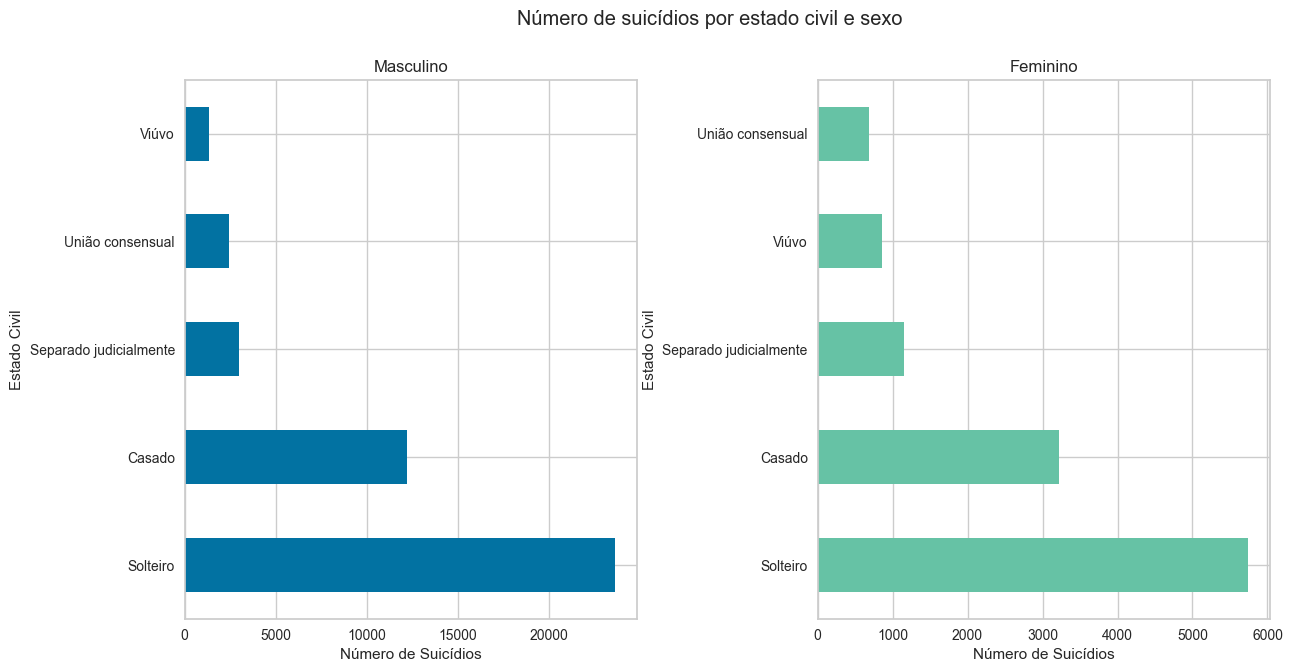

In [17]:
# Criar subplots para o n√∫mero de suic√≠dios por estado civil e g√™nero
figure, axes = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'wspace': 0.4})

# Gr√°fico para g√™nero masculino
df_suicidio_m['estado_civil'].value_counts().plot(kind='barh', ax=axes[0])
axes[0].set_title('Masculino')
axes[0].set_xlabel('N√∫mero de Suic√≠dios')
axes[0].set_ylabel('Estado Civil')

# Gr√°fico para g√™nero feminino
df_suicidio_f['estado_civil'].value_counts().plot(kind='barh', ax=axes[1], colormap='Set2')
axes[1].set_title('Feminino')
axes[1].set_xlabel('N√∫mero de Suic√≠dios')
axes[1].set_ylabel('Estado Civil')

# T√≠tulo geral
figure.suptitle('N√∫mero de suic√≠dios por estado civil e sexo')

# Exibir os gr√°ficos
plt.show()


> **Gr√°fico de suic√≠dios por ano**
>
> H√° um aumento gradual no n√∫mero de suic√≠dios ao longo dos anos, indicando poss√≠veis agravamentos em fatores socioecon√¥micos e de sa√∫de mental.

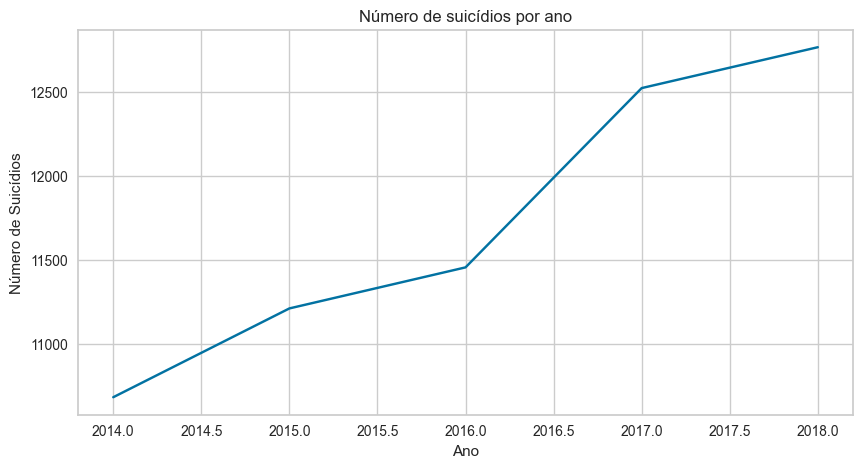

In [18]:
# Criar figura para o n√∫mero de suic√≠dios por ano
plt.figure(figsize=(10, 5))
plt.title('N√∫mero de suic√≠dios por ano')

# Plotar o gr√°fico de linhas com o n√∫mero de suic√≠dios por ano
sns.lineplot(data=df_suicidio['ano'].value_counts().sort_index())

# Adicionar r√≥tulos aos eixos
plt.xlabel('Ano')
plt.ylabel('N√∫mero de Suic√≠dios')

# Exibir o gr√°fico
plt.show()


> **Gr√°fico de suic√≠dios por local de ocorr√™ncia**
>
> A maioria dos suic√≠dios ocorre em domic√≠lios, seguido de hospitais e locais p√∫blicos, indicando pouca interven√ß√£o em momentos cr√≠ticos.

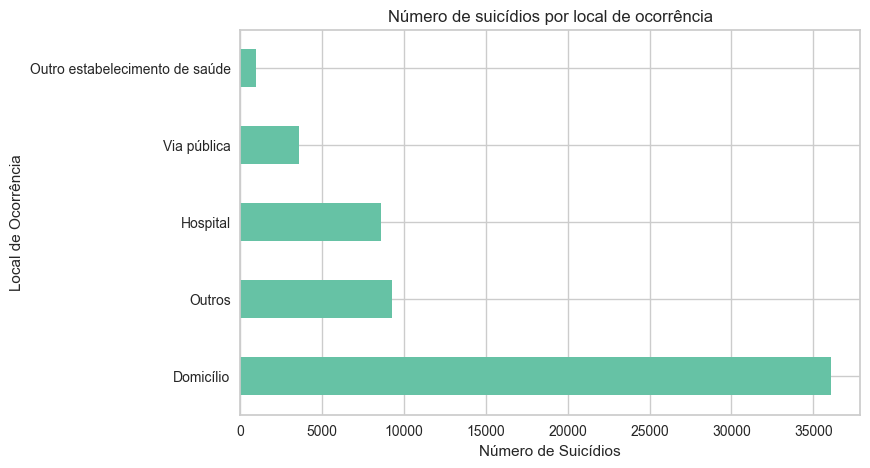

In [19]:
df_suicidio = df_suicidio[df_suicidio['local_obito'] != '6']

# Criar gr√°fico de barras horizontais para o n√∫mero de suic√≠dios por local de ocorr√™ncia
df_suicidio['local_obito'].value_counts().plot(kind='barh', colormap='Set2', figsize=(8, 5), 
                                               title='N√∫mero de suic√≠dios por local de ocorr√™ncia')

# Adicionar r√≥tulos aos eixos
plt.xlabel('N√∫mero de Suic√≠dios')
plt.ylabel('Local de Ocorr√™ncia')

# Exibir o gr√°fico
plt.show()


> **Gr√°fico de suic√≠dios por ra√ßa/cor da pele**
>
>  Pessoas brancas representam a maioria dos casos, seguidas por pardas e pretas, evidenciando quest√µes sociais e acesso a servi√ßos de sa√∫de mental.

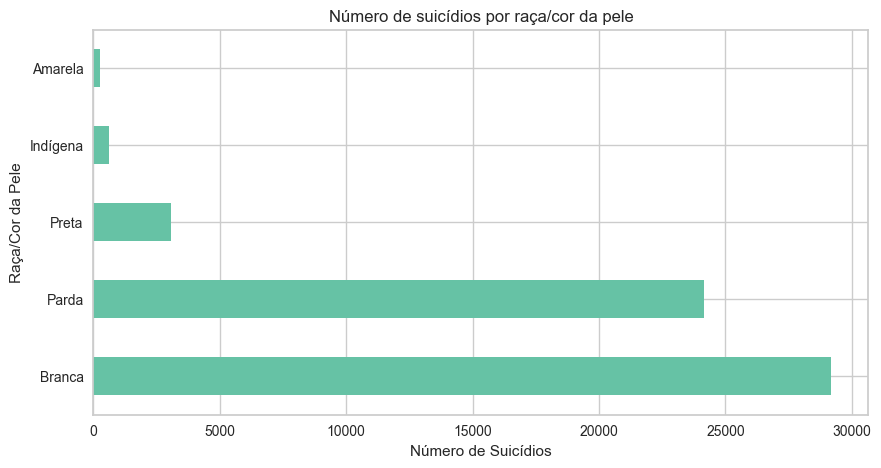

In [20]:
# Criar gr√°fico de barras horizontais para o n√∫mero de suic√≠dios por ra√ßa/cor da pele
df_suicidio['raca_cor'].value_counts().plot(kind='barh', colormap='Set2', figsize=(10, 5), 
                                            title='N√∫mero de suic√≠dios por ra√ßa/cor da pele')

# Adicionar r√≥tulos aos eixos
plt.xlabel('N√∫mero de Suic√≠dios')
plt.ylabel('Ra√ßa/Cor da Pele')

# Exibir o gr√°fico
plt.show()


> **Explica√ß√£o gen√©rica do que deve ser feito antes da etapa de clusteriza√ß√£o**
>
> **Antes da etapa de clusteriza√ß√£o**, √© importante realizar as etapas de pr√©-processamento e prepara√ß√£o de dados para garantir que os dados estejam em um formato adequado para a an√°lise de clusters.
> 
> <b>Etapas a serem realizadas antes da clusteriza√ß√£o:</b>
> - <b>Limpeza de dados:</b> Verificar a presen√ßa de valores ausentes e, se encontrados, remov√™-los ou trat√°-los adequadamente para evitar impactos negativos na an√°lise.
> - <b>Detec√ß√£o e tratamento de outliers:</b> Identificar outliers e decidir se devem ser transformados, removidos ou mantidos, considerando seu impacto potencial na qualidade da clusteriza√ß√£o.
> - <b>Normaliza√ß√£o ou padroniza√ß√£o:</b> Aplicar t√©cnicas de normaliza√ß√£o ou padroniza√ß√£o para garantir que todas as vari√°veis estejam na mesma escala, evitando que alguma vari√°vel domine o processo de clusteriza√ß√£o.
> - <b>Redu√ß√£o de Dimensionalidade:</b> Utilizar t√©cnicas como PCA (An√°lise de Componentes Principais) para reduzir o n√∫mero de vari√°veis, mantendo a maior parte da variabilidade dos dados.
> - <b>Sele√ß√£o de Caracter√≠sticas:</b> Escolher as vari√°veis mais relevantes para a an√°lise de clusteriza√ß√£o.
> - <b>Transforma√ß√£o de Dados:</b> Aplicar transforma√ß√µes logar√≠tmicas ou de raiz quadrada, se necess√°rio, para lidar com distribui√ß√µes assim√©tricas.
><br><br>

### Quest√£o 4) Realize o pr√©-processamento adequado dos dados. <br>Descreva os passos necess√°rios.


> **Pr√©-processamento dos dados do dataset** ‚Äã‚Äã
>
> 1. **Valores ausentes:** Ser√£o tratados usando o m√©todo de "forward fill", preenchendo os valores ausentes com os dados anteriores.
>
> 2. **Tratamento de outliers:** Os outliers na vari√°vel "Idade" ser√£o identificados e removidos utilizando o m√©todo do intervalo interquartil (IQR), enquanto as vari√°veis "Ano" e "M√™s" ser√£o verificadas, embora n√£o apresentem tend√™ncia significativa de outliers.
>
> 3. **Vari√°veis categ√≥ricas:** As vari√°veis como "genero", "raca_cor", "estado_civil", "escolaridade", "ocupacao", "local_obito", "assistencia_medica", e "causa_basica_obito" ser√£o convertidas para valores num√©ricos usando a t√©cnica de Label Encoding.
>
> 4. **Escalonamento das vari√°veis num√©ricas:** As vari√°veis "Idade", "Ano" e "M√™s" ser√£o padronizadas para garantir que todas tenham m√©dia 0 e desvio padr√£o 1, evitando que diferen√ßas de escala influenciem negativamente os algoritmos de clusteriza√ß√£o como K-Means.
>
> Desta forma os dados estar√£o prontos para a etapa de clusteriza√ß√£o.

> **Limpeza de dados**
> <br>
> - Verifica√ß√£o de dados ausentes

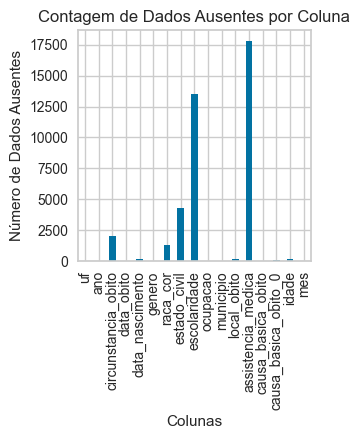

In [21]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', figsize=(3,3))
plt.title("Contagem de Dados Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("N√∫mero de Dados Ausentes")
plt.show();

In [22]:
print(f"N√∫mero de linhas: {df.shape[0]}")
print(f"N√∫mero de colunas: {df.shape[1]}")

N√∫mero de linhas: 58634
N√∫mero de colunas: 17


> Verificamos a presen√ßa de dados ausentes em algumas vari√°veis do dataset.

> **Passo 1: Tratamento de valores ausentes**

In [23]:
df.ffill(inplace=True)  # Usando o m√©todo de forward fill para tratar valores ausentes

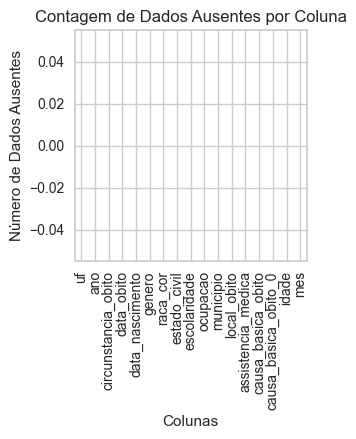

In [24]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', figsize=(3,3))
plt.title("Contagem de Dados Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("N√∫mero de Dados Ausentes")
plt.show();

In [25]:
print(f"N√∫mero de linhas: {df.shape[0]}")
print(f"N√∫mero de colunas: {df.shape[1]}")

N√∫mero de linhas: 58634
N√∫mero de colunas: 17


> **Passo 2, 3 e 4: Tratamento de Outliers, Codifica√ß√£o Categ√≥rica e Escalonamento**

In [26]:
# Fun√ß√£o para tratar outliers
def remove_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filtrar dados dentro dos limites
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        else:
            raise KeyError(f"A coluna '{column}' n√£o existe no DataFrame.")
    return df

# Fun√ß√£o para converter vari√°veis categ√≥ricas em num√©ricas
def encode_categorical_columns(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        if col in df.columns:
            df[col] = encoder.fit_transform(df[col].astype(str))
        else:
            raise KeyError(f"A coluna '{col}' n√£o foi encontrada no DataFrame.")
    return df

# Fun√ß√£o para escalonar vari√°veis num√©ricas
def scale_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Vari√°veis num√©ricas e categ√≥ricas
numerical_columns = ['idade', 'ano', 'mes']   # Vari√°veis num√©ricas originais
categorical_columns = ['genero', 'raca_cor', 'estado_civil', 'escolaridade', 
                       'ocupacao', 'local_obito', 'assistencia_medica', 'causa_basica_obito']

# Passo 2: Tratamento de Outliers
df = remove_outliers(df, numerical_columns)

# Passo 3: Convers√£o de vari√°veis categ√≥ricas para num√©ricas
df = encode_categorical_columns(df, categorical_columns)

# Passo 4: Escalonamento de todas as colunas relevantes
all_columns_to_scale = numerical_columns + categorical_columns
df = scale_columns(df, all_columns_to_scale)

# Exibir as primeiras linhas ap√≥s o pr√©-processamento
print("Dados ap√≥s o pr√©-processamento:")
print(df.head())

Dados ap√≥s o pr√©-processamento:
   uf       ano circunstancia_obito data_obito data_nascimento    genero  \
0  AC -1.482113            Suic√≠dio   02-01-14        02-07-77  0.519473   
1  AC -1.482113            Suic√≠dio   23-01-14        30-07-66  0.519473   
2  AC -1.482113            Suic√≠dio   31-01-14        28-07-43  0.519473   
3  AC -1.482113            Suic√≠dio   05-02-14        04-07-99  0.519473   
4  AC -1.482113            Suic√≠dio   06-02-14        02-05-72  0.519473   

   raca_cor  estado_civil  escolaridade  ocupacao       municipio  \
0  1.839596     -1.376391      0.037002 -0.857220      Rio Branco   
1 -0.945219      1.393230     -0.807529  0.370036      Rio Branco   
2 -0.945219      1.393230     -0.807529 -1.111588      Rio Branco   
3 -0.945219      0.470023      0.037002 -0.065273  Epitaciol√¢ndia   
4 -0.945219      0.470023      0.037002 -1.111588      Rio Branco   

   local_obito  assistencia_medica  causa_basica_obito causa_basica_obito_0  \
0    -0.6

In [27]:
print(f"N√∫mero de linhas: {df.shape[0]}")
print(f"N√∫mero de colunas: {df.shape[1]}")

N√∫mero de linhas: 58497
N√∫mero de colunas: 17


> Ap√≥s o tratamento de outliers, tivemos a diminui√ß√£o de n√∫meros de linhas de 58.634 para 58.497.

> **Justificativa para Exclus√£o de Vari√°veis no Pr√©-Processamento**
>
> As vari√°veis **`uf`**, **`data_obito`**, **`data_nascimento`**, **`municipio`** e **`causa_basica_obito_0`** n√£o foram convertidas em num√©ricas porque possuem caracter√≠sticas que dificultam sua interpreta√ß√£o direta no contexto da clusteriza√ß√£o:
>
> 1. **`uf` e `municipio`**:  
   S√£o vari√°veis categ√≥ricas com grande n√∫mero de categorias e sem uma rela√ß√£o ordinal ou proximidade natural. A convers√£o poderia introduzir correla√ß√µes artificiais, prejudicando os resultados da an√°lise.
>
> 2. **`data_obito` e `data_nascimento`**:  
   Representam datas que, sem transforma√ß√£o adequada (como extra√ß√£o de componentes como ano ou m√™s), n√£o possuem significado num√©rico direto. Al√©m disso, parte da informa√ß√£o dessas vari√°veis j√° est√° refletida na vari√°vel `idade`.
>
> 3. **`causa_basica_obito_0`**:  
   √â um detalhamento adicional de `causa_basica_obito`, e, para evitar redund√¢ncia, n√£o foi inclu√≠da. Se necess√°rio, poderia ser incorporada com transforma√ß√£o adequada.
>
> Essas vari√°veis poderiam ser transformadas e usadas dependendo do objetivo, mas foram exclu√≠das neste caso para priorizar simplicidade e evitar ru√≠do nos dados.

> **Faixa din√¢mica das vari√°veis num√©ricas para serem usadas na clusteriza√ß√£o**

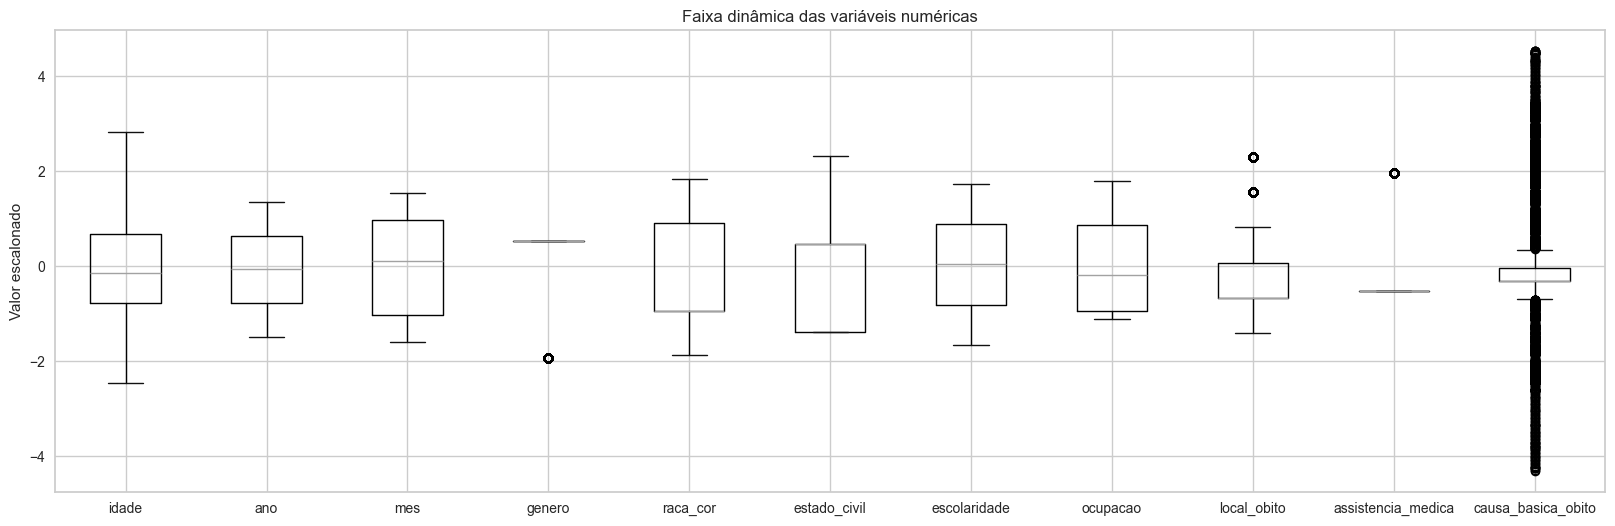

In [28]:
# Gr√°fico: Visualiza√ß√£o das vari√°veis escalonadas
plt.figure(figsize=(20, 6))
df[all_columns_to_scale].boxplot()
plt.title('Faixa din√¢mica das vari√°veis num√©ricas')
plt.ylabel('Valor escalonado')
plt.show()

> **An√°lise por vari√°vel ap√≥s o pr√©-processamento**
> <br><br>
> **Idade:**
> - Tem uma amplitude consider√°vel.
> - Outliers observados, possivelmente indicando idades muito diferentes da maioria.
>
> **Ano e M√™s:**
> - Ambas as vari√°veis mostram distribui√ß√µes discretas e uniformes, refletindo o intervalo de anos (2014-2018) e meses (1-12).
> - N√£o h√° ind√≠cios significativos de outliers, pois os dados est√£o dentro das faixas esperadas.
>
> **G√™nero:**
> - Mostra baixa variabilidade, possivelmente devido √† codifica√ß√£o num√©rica de uma vari√°vel categ√≥rica com poucas categorias (por exemplo, "Masculino" e "Feminino").
>
> **Ra√ßa/Cor:**
> - Apresenta uma distribui√ß√£o equilibrada com poucos outliers, indicando alguma variabilidade.
>
> **Estado Civil, Escolaridade, Ocupa√ß√£o, Local de √ìbito:**
> - T√™m distribui√ß√µes mais uniformes, mas com alguns outliers que podem indicar situa√ß√µes particulares (Exemplo: ocupa√ß√µes ou n√≠veis de escolaridade incomuns).
>
> **Assist√™ncia M√©dica:**
> - Pouca variabilidade. Pode ser uma vari√°vel categ√≥rica codificada numericamente.
>
> **Causa B√°sica do √ìbito:**
> - Muitos outliers, indicando alta diversidade nas causas.

----------------------------

# **Parte 3 - Clusteriza√ß√£o**
## Para os dados pr√©-processados da etapa anterior voc√™ ir√°:

### Quest√£o 1) Realizar o agrupamento dos dados, escolhendo o n√∫mero √≥timo de clusters. <br>Para tal, use o √≠ndice de silhueta e as t√©cnicas:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) K-M√©dias <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) DBScan

> Resposta:<br>
> O c√≥digo a seguir realiza a sele√ß√£o autom√°tica do n√∫mero √≥timo de clusters (`ùëò`) para o K-M√©dias e encontra os melhores par√¢metros (`ùúñ`) para o DBSCAN usando o √≠ndice de silhueta.
>
> **K-M√©dias**
> <br>O √≠ndice de silhueta √© calculado para valores de ùëò no intervalo de 2 a 10.
> <br>O loop testa diferentes valores de ùëò, treina o modelo K-M√©dias e calcula o √≠ndice de silhueta para cada valor.
> 
> **DBSCan**
> <br>O √≠ndice de silhueta √© calculado para diferentes valores de ùúñ no intervalo de 0.5 a 2.0 (incrementos de 0.1).
> <br>O c√≥digo evita calcular o √≠ndice de silhueta quando h√° apenas um cluster ou quando todos os pontos s√£o considerados ru√≠do.
> <br>Valores inv√°lidos para clusters √∫nicos ou ru√≠do s√£o representados como ‚àí1, o que ajuda a filtrar resultados inadequados.

In [29]:
# Parte 3 - Clusteriza√ß√£o com Sele√ß√£o Autom√°tica de k e eps

# Criando o DataFrame a partir do dataset
df, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
df = pd.DataFrame(df, columns=['Feature_1', 'Feature_2'])

# a. K-M√©dias: Determinando o n√∫mero ideal de clusters usando o √≠ndice de silhueta
silhouette_scores = []
k_values = range(2, 11)  # Testando tamanhos de cluster de 2 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Encontrar o valor √≥timo de k (o que maximiza o √≠ndice de silhueta)
optimal_k = k_values[np.argmax(silhouette_scores)]

# b. DBSCAN: Determinando os melhores par√¢metros usando o √≠ndice de silhueta
eps_values = np.arange(0.5, 2.0, 0.1)
silhouette_scores_dbscan = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df)
    unique_labels = set(labels) - {-1}  # Remove o ru√≠do (-1)
    if len(unique_labels) > 1:  # Evitar c√°lculo de √≠ndice de silhueta para clusters √∫nicos
        silhouette_scores_dbscan.append(silhouette_score(df, labels))
    else:
        silhouette_scores_dbscan.append(-1)

### Quest√£o 2) Com os resultados em m√£o, descreva o processo de mensura√ß√£o do √≠ndice de silhueta. <br>Mostre o gr√°fico e justifique o n√∫mero de clusters escolhidos.

> Resposta:
>
> **Descri√ß√£o do Processo de Mensura√ß√£o do √çndice de Silhueta**
> 1. C√°lculo do √çndice de Silhueta:
> - Para cada valor de ùëò no K-M√©dias e ùúñ no DBSCAN, o √≠ndice de silhueta √© calculado. Este √≠ndice avalia:
>   - Coes√£o: Qu√£o pr√≥ximos os pontos est√£o dentro de um mesmo cluster.
>   - Separa√ß√£o: Qu√£o distintos os clusters est√£o uns dos outros.
> - O √≠ndice varia de -1 a 1, onde valores mais pr√≥ximos de 1 indicam melhor defini√ß√£o de clusters.
>
> 2. Sele√ß√£o do Melhor Valor:
> - Para o K-M√©dias, o valor de ùëò que maximiza o √≠ndice de silhueta √© escolhido como o √≥timo. 
> - Para o DBSCAN, o ùúñ que maximiza o √≠ndice de silhueta √© considerado o ideal.

> **√çndices de silhueta para K-M√©dias**
>
> - O c√≥digo encontra ùëò √≥timo com *`np.argmax(silhouette_scores)`* e destaca o valor no gr√°fico com uma linha vertical vermelha.
> - O gr√°fico claramente mostra o ponto de m√°ximo do √≠ndice de silhueta para justificar a escolha de ùëò=4.

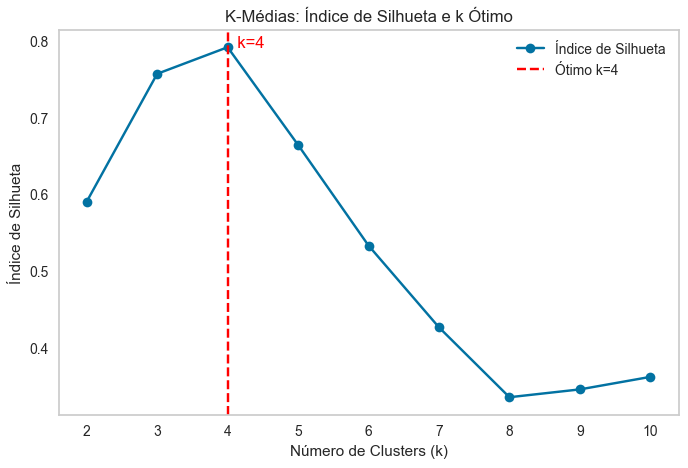

O n√∫mero ideal de clusters (k) no K-M√©dias √©: 4


In [30]:
# Encontrar o valor √≥timo de k (o que maximiza o √≠ndice de silhueta)
optimal_k = k_values[np.argmax(silhouette_scores)]

# Plotando os √≠ndices de silhueta para K-M√©dias
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='√çndice de Silhueta')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'√ìtimo k={optimal_k}')
plt.text(optimal_k, max(silhouette_scores), f'  k={optimal_k}', color='red')
plt.title('K-M√©dias: √çndice de Silhueta e k √ìtimo')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('√çndice de Silhueta')
plt.legend()
plt.grid()
plt.show()

print(f"O n√∫mero ideal de clusters (k) no K-M√©dias √©: {optimal_k}")

> **Gr√°fico de Clusteriza√ß√£o com K-M√©dias**
>
> O gr√°fico ilustra a clusteriza√ß√£o realizada pelo algoritmo K-M√©dias com k=4. Os pontos coloridos representam os clusters, e os "X" vermelhos indicam os centr√≥ides de cada cluster.

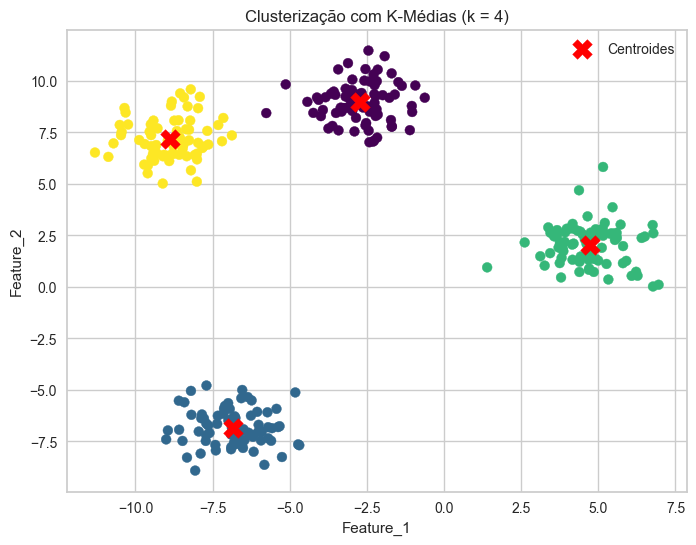

In [31]:
# Clusteriza√ß√£o com K-M√©dias
optimal_k = 4  # N√∫mero ideal de clusters encontrado anteriormente
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Gr√°fico de Clusteriza√ß√£o
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=labels_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title(f'Clusteriza√ß√£o com K-M√©dias (k = {optimal_k})')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.grid(True)
plt.show()


> **√çndices de silhueta para DBSCAN**
>
> - De forma similar, o ùúñ ideal √© encontrado usando *`np.argmax(silhouette_scores_dbscan)`* e marcado no gr√°fico.
> - O gr√°fico demonstra que ùúñ=1.3 √© o valor que maximiza o √≠ndice de silhueta.

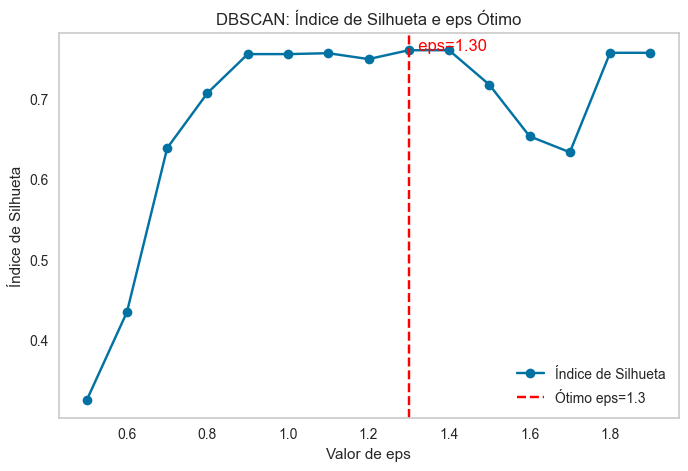

O valor ideal de eps no DBSCAN √©: 1.30


In [32]:
# Encontrar o valor √≥timo de eps (o que maximiza o √≠ndice de silhueta)
optimal_eps = eps_values[np.argmax(silhouette_scores_dbscan)]

# Plotando os √≠ndices de silhueta para DBSCAN
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores_dbscan, marker='o', label='√çndice de Silhueta')
if optimal_eps:
    plt.axvline(optimal_eps, color='red', linestyle='--', label=f'√ìtimo eps={optimal_eps:.1f}')
    plt.text(optimal_eps, max(silhouette_scores_dbscan), f'  eps={optimal_eps:.2f}', color='red')
plt.title('DBSCAN: √çndice de Silhueta e eps √ìtimo')
plt.xlabel('Valor de eps')
plt.ylabel('√çndice de Silhueta')
plt.legend()
plt.grid()
plt.show()

print(f"O valor ideal de eps no DBSCAN √©: {optimal_eps:.2f}")

> **Gr√°fico de Clusteriza√ß√£o com DBSCAN**
>
> O gr√°fico mostra a clusteriza√ß√£o gerada pelo DBSCAN com œµ=1.3. Os clusters s√£o representados por cores distintas, enquanto os pontos sem cluster (ru√≠do) est√£o em uma cor separada.

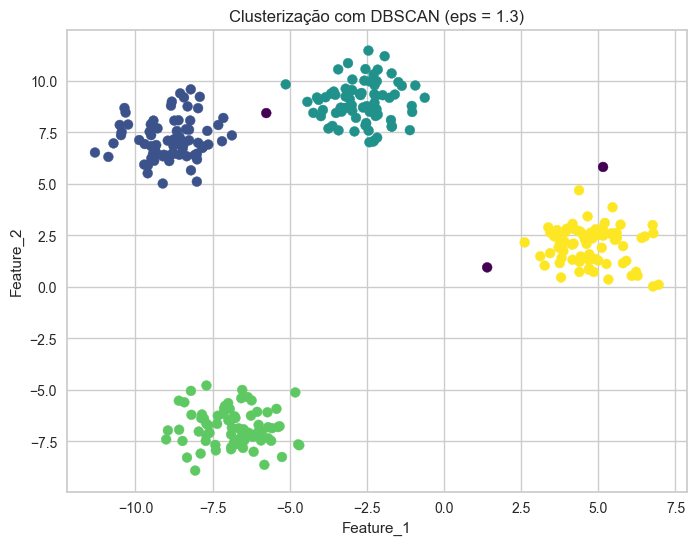

In [33]:
# Clusteriza√ß√£o com DBSCAN
optimal_eps = 1.3  # Valor √≥timo de eps encontrado anteriormente
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
labels_dbscan = dbscan.fit_predict(df)

# Gr√°fico de Clusteriza√ß√£o
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=labels_dbscan, cmap='viridis', s=50)
plt.title(f'Clusteriza√ß√£o com DBSCAN (eps = {optimal_eps:.1f})')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.grid(True)
plt.show()


> **Justificativa dos Clusters Escolhidos**
> - No **K-M√©dias**, o √≠ndice de silhueta atinge o m√°ximo quando ùëò=4, indicando que 4 clusters fornecem o melhor balan√ßo entre coes√£o e separa√ß√£o.
>
> - No **DBSCAN**, o valor de œµ=1.3 fornece o melhor agrupamento, conforme medido pelo √≠ndice de silhueta.

### Quest√£o 3) Compare os dois resultados, aponte as semelhan√ßas e diferen√ßas e interprete.

> **Resposta:**
>
> **Semelhan√ßas:**
>
> - **√çndice de Silhueta como M√©trica:** Em ambos os casos, o √≠ndice de silhueta foi usado para avaliar a qualidade dos agrupamentos. Ele mede a proximidade de cada ponto em rela√ß√£o ao seu cluster e a separa√ß√£o em rela√ß√£o a outros clusters.<br><br>
> - **Varia√ß√£o da Qualidade com Par√¢metros:** Tanto no K-M√©dias quanto no DBSCAN, a qualidade dos agrupamentos varia de acordo com os par√¢metros: o n√∫mero de clusters (`k`) no K-M√©dias e o raio de vizinhan√ßa (`eps`) no DBSCAN.<br><br>
> - **Identifica√ß√£o de Pontos √ìtimos:** Ambos os algoritmos permitem identificar configura√ß√µes espec√≠ficas com melhor desempenho, refletidas em picos no √≠ndice de silhueta.
>
> **Diferen√ßas:**
> <br><br>
>
 | Aspecto                     | K-M√©dias                                  | DBSCAN                                      |
 |-----------------------------|-------------------------------------------|--------------------------------------------|
 | **Par√¢metro Principal**      | N√∫mero de clusters (`k`).                | Valor de `eps` (raio de vizinhan√ßa) e `min_samples`. |
 | **Comportamento do Gr√°fico** | O √≠ndice de silhueta atinge um pico claro em 4 clusters e decresce continuamente. | O √≠ndice de silhueta varia, com uma regi√£o est√°vel entre `eps` de 1.0 a 1.4, mas flutua√ß√µes fora dessa faixa. |
 | **N√∫mero de Agrupamentos**   | Define diretamente o n√∫mero de clusters.  | Determina dinamicamente o n√∫mero de clusters, podendo incluir ru√≠dos (`-1`). |
 | **Tratamento de Outliers**   | N√£o trata diretamente outliers, atribuindo-os a clusters. | Identifica outliers explicitamente como ru√≠dos (`-1`). |
 | **Formas dos Clusters**      | Assume clusters esf√©ricos e balanceados. | Lida com clusters de formas arbitr√°rias.   |
>
> <br>
>
> **Interpreta√ß√£o:**
>
> **K-M√©dias:**
> - O gr√°fico do √≠ndice de silhueta mostra um pico claro para 4 clusters, consistente com a estrutura subjacente dos dados (conforme o dataset gerado).
> - Ap√≥s 4 clusters, a qualidade diminui, indicando que dividir os dados em mais grupos n√£o reflete bem a estrutura original.
>
> **DBSCAN:**
> - O √≠ndice de silhueta varia conforme o valor de `eps`. Uma faixa √≥tima foi observada entre `eps` de 1.0 e 1.4, com desempenho est√°vel.
> - Fora dessa faixa, valores baixos de `eps` resultam em clusters pequenos ou ru√≠dos excessivos, enquanto valores altos agrupam pontos em um √∫nico cluster, reduzindo a qualidade.
>
> **Conclus√£o:**
>
> **K-M√©dias:**
> - √â mais adequado para dados com clusters bem definidos e de tamanhos equilibrados, como no exemplo testado.
> - Sua depend√™ncia de `k` torna-o sens√≠vel √† escolha inicial do n√∫mero de clusters.
>
> **DBSCAN:**
> - √â mais robusto para lidar com outliers e clusters de formas irregulares. No entanto, a escolha de `eps` √© cr√≠tica e pode impactar fortemente os resultados.
> - O √≠ndice de silhueta n√£o √© ideal para avaliar DBSCAN, j√° que clusters muito pequenos ou ru√≠dos influenciam negativamente a m√©trica. M√©tricas alternativas, como o √≠ndice de Davies-Bouldin, podem ser mais apropriadas.


### Quest√£o 4) Escolha mais duas medidas de valida√ß√£o para comparar com o √≠ndice de silhueta e analise os resultados encontrados. <br>Observe, para a escolha, medidas adequadas aos algoritmos.

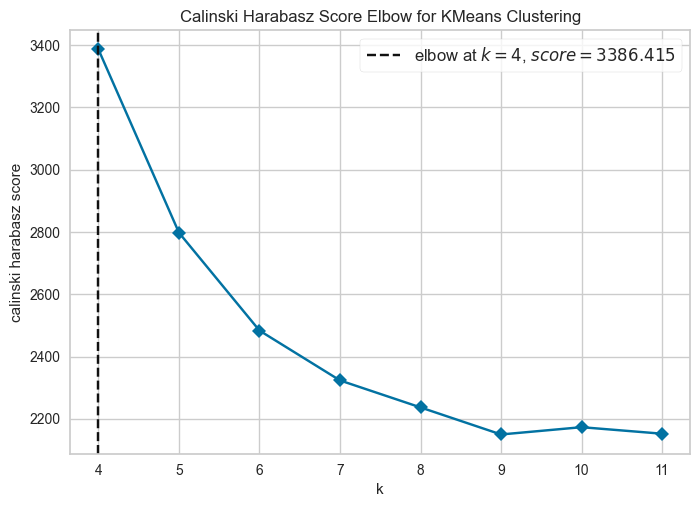

Coeficiente de Calinski-Harabasz (K-M√©dias): 3386.41
√çndice de Davies-Bouldin (K-M√©dias): 0.29


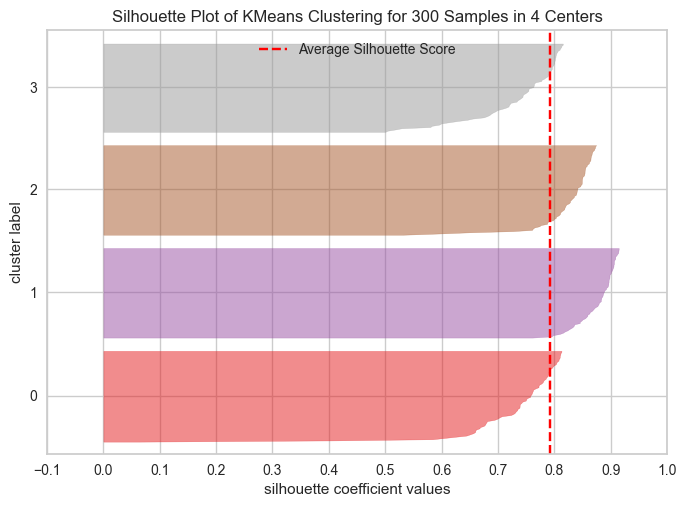

Coeficiente de Calinski-Harabasz (DBSCAN): 3564.36
√çndice de Davies-Bouldin (DBSCAN): 0.29

Resumo dos resultados:
K-M√©dias - Calinski-Harabasz: 3386.41, Davies-Bouldin: 0.29
DBSCAN - Calinski-Harabasz: 3564.36, Davies-Bouldin: 0.29


In [34]:
# Usando KElbowVisualizer para determinar o n√∫mero ideal de clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4, 12), metric='calinski_harabasz', timings=False)

visualizer.fit(df)  # Ajusta os dados ao visualizador
visualizer.show()  # Exibe o gr√°fico de cotovelo (Elbow)

# Calculando as m√©tricas para K-M√©dias
optimal_k = visualizer.elbow_value_  # Obt√©m o n√∫mero ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

ch_kmeans = calinski_harabasz_score(df, kmeans_labels)
db_kmeans = davies_bouldin_score(df, kmeans_labels)

# Exibindo as m√©tricas para K-M√©dias
print(f"Coeficiente de Calinski-Harabasz (K-M√©dias): {ch_kmeans:.2f}")
print(f"√çndice de Davies-Bouldin (K-M√©dias): {db_kmeans:.2f}")

# Visualizando a qualidade dos clusters com SilhouetteVisualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(n_clusters=optimal_k, random_state=42))
silhouette_visualizer.fit(df)
silhouette_visualizer.show()

# Usando DBSCAN com valida√ß√£o
dbscan = DBSCAN(eps=1.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

# Filtrando os dados v√°lidos para DBSCAN
valid_data = df[dbscan_labels != -1]
valid_labels = dbscan_labels[dbscan_labels != -1]

# Calculando as m√©tricas para DBSCAN
if len(set(valid_labels)) > 1:  # Verifica se h√° mais de um cluster v√°lido
    ch_dbscan = calinski_harabasz_score(valid_data, valid_labels)
    db_dbscan = davies_bouldin_score(valid_data, valid_labels)
else:
    ch_dbscan = db_dbscan = None

# Exibindo as m√©tricas para DBSCAN
if ch_dbscan is not None:
    print(f"Coeficiente de Calinski-Harabasz (DBSCAN): {ch_dbscan:.2f}")
    print(f"√çndice de Davies-Bouldin (DBSCAN): {db_dbscan:.2f}")
else:
    print("DBSCAN: N√£o h√° clusters v√°lidos para calcular os √≠ndices.")

# **Resumo**
print("\nResumo dos resultados:")
print(f"K-M√©dias - Calinski-Harabasz: {ch_kmeans:.2f}, Davies-Bouldin: {db_kmeans:.2f}")
if ch_dbscan is not None:
    print(f"DBSCAN - Calinski-Harabasz: {ch_dbscan:.2f}, Davies-Bouldin: {db_dbscan:.2f}")
else:
    print("DBSCAN - N√£o foi poss√≠vel calcular m√©tricas para clusters v√°lidos.")


**Resposta:**

**K-M√©dias:**
- Calinski-Harabasz: 3386.41
- Davies-Bouldin: 0.29

**DBSCAN:**
- Calinski-Harabasz: 3564.36
- Davies-Bouldin: 0.29

**An√°lise dos Resultados**
- **Coeficiente de Calinski-Harabasz:**
  - Valores mais altos para DBSCAN (**3564.36**) indicam que os clusters gerados por este m√©todo s√£o mais densos e bem separados do que os clusters formados pelo K-M√©dias (**3386.41**).
  - Isso reflete a capacidade do DBSCAN de lidar com clusters de formas irregulares e com outliers, caracter√≠sticas que s√£o mais desafiadoras para o K-M√©dias.

- **√çndice de Davies-Bouldin:**
  - Os valores de Davies-Bouldin s√£o iguais para ambos os m√©todos (**0.29**), sugerindo que, neste caso, tanto o DBSCAN quanto o K-M√©dias criaram clusters com n√≠veis equivalentes de coes√£o interna e separa√ß√£o entre os grupos.
  - N√£o h√° evid√™ncia de superioridade entre os m√©todos com base nessa m√©trica.

**Conclus√£o**
- Ambas as m√©tricas complementam o √≠ndice de silhueta, oferecendo perspectivas adicionais sobre coes√£o e separa√ß√£o.
- O DBSCAN apresentou um coeficiente de Calinski-Harabasz superior, destacando sua adequa√ß√£o para dados com formas de clusters mais complexas ou com outliers.
- O K-M√©dias, por outro lado, √© uma escolha s√≥lida para dados onde os clusters t√™m formas esf√©ricas e bem definidas, como indicado pela equival√™ncia nos valores de Davies-Bouldin e pela qualidade geral dos clusters formados.


In [35]:
# Propor√ß√£o de Ru√≠do
def noise_proportion(labels):
    n_noise = np.sum(labels == -1)
    return n_noise / len(labels)

# Calculando para o DBSCAN com o melhor eps encontrado
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)
noise_ratio = noise_proportion(dbscan_labels)

print(f"Propor√ß√£o de Ru√≠do (DBSCAN, eps={optimal_eps}): {noise_ratio:.2f}")


Propor√ß√£o de Ru√≠do (DBSCAN, eps=1.3): 0.01


> O resultado indica que a propor√ß√£o de ru√≠do no agrupamento DBSCAN com o par√¢metro eps=1.3 √© 0.01, ou seja, 1% dos pontos foram classificados como ru√≠do pelo algoritmo.

### Quest√£o 5) Realizando a an√°lise, responda: <br>A silhueta √© um o √≠ndice indicado para escolher o n√∫mero de clusters para o algoritmo de DBScan?

> Resposta:
>
> O √≠ndice de silhueta √© √∫til para avaliar a qualidade da configura√ß√£o dos clusters no DBSCAN, mas n√£o √© o √≠ndice mais indicado para escolher o n√∫mero de clusters, especialmente porque o DBSCAN n√£o define clusters explicitamente como outros algoritmos (K-Means, por exemplo).<br>
> No DBSCAN, √© mais adequado analisar o comportamento do algoritmo com diferentes valores de eps e *`min_samples`*, al√©m de usar ferramentas como gr√°ficos de densidade ou inspe√ß√£o visual para interpretar os resultados.

# Parte 4 - Medidas de similaridade

### Quest√£o 1) Um determinado problema, apresenta 10 s√©ries temporais distintas. Gostar√≠amos de agrup√°-las em 3 grupos, de acordo com um crit√©rio de similaridade, baseado no valor m√°ximo de correla√ß√£o cruzada entre elas. Descreva em t√≥picos todos os passos necess√°rios.

> Resposta:
>
> Passos necess√°rios para agrupar s√©ries temporais utilizando o valor m√°ximo de correla√ß√£o cruzada:
> 1. **Carregar as s√©ries temporais:**
> - Obter as 10 s√©ries temporais e organizar em um formato adequado (por exemplo, um dataframe ou matriz).
> 2. **Normalizar as s√©ries temporais:**
> - Certificar que as s√©ries possuem a mesma escala (exemplo: padronizar valores para m√©dia zero e desvio-padr√£o 1).
> 3. **Calcular a correla√ß√£o cruzada:**
> - Para cada par de s√©ries temporais, calcular a correla√ß√£o cruzada.
> - Identificar o valor m√°ximo da correla√ß√£o cruzada para cada par, independentemente do deslocamento temporal.
> 4. **Criar uma matriz de similaridade:**
> - Montar uma matriz *n√ón*, onde n √© o n√∫mero de s√©ries temporais.
> - Cada elemento *(i,j)* da matriz deve conter o valor m√°ximo de correla√ß√£o cruzada entre as s√©ries *i e j*.
> 5. **Aplicar um algoritmo de clusteriza√ß√£o:**
> - Usar a matriz de similaridade como entrada para o algoritmo escolhido.
> - Determinar o n√∫mero de clusters desejado (3, neste caso).
> 6. **Avaliar os clusters:**
> - Analisar os resultados e, se necess√°rio, ajustar os par√¢metros do algoritmo.
> 7. **Visualizar os resultados:**
> - Gerar gr√°ficos, como dendrogramas (para clusteriza√ß√£o hier√°rquica) ou agrupamentos plotados em um espa√ßo reduzido (ex.: PCA ou t-SNE).


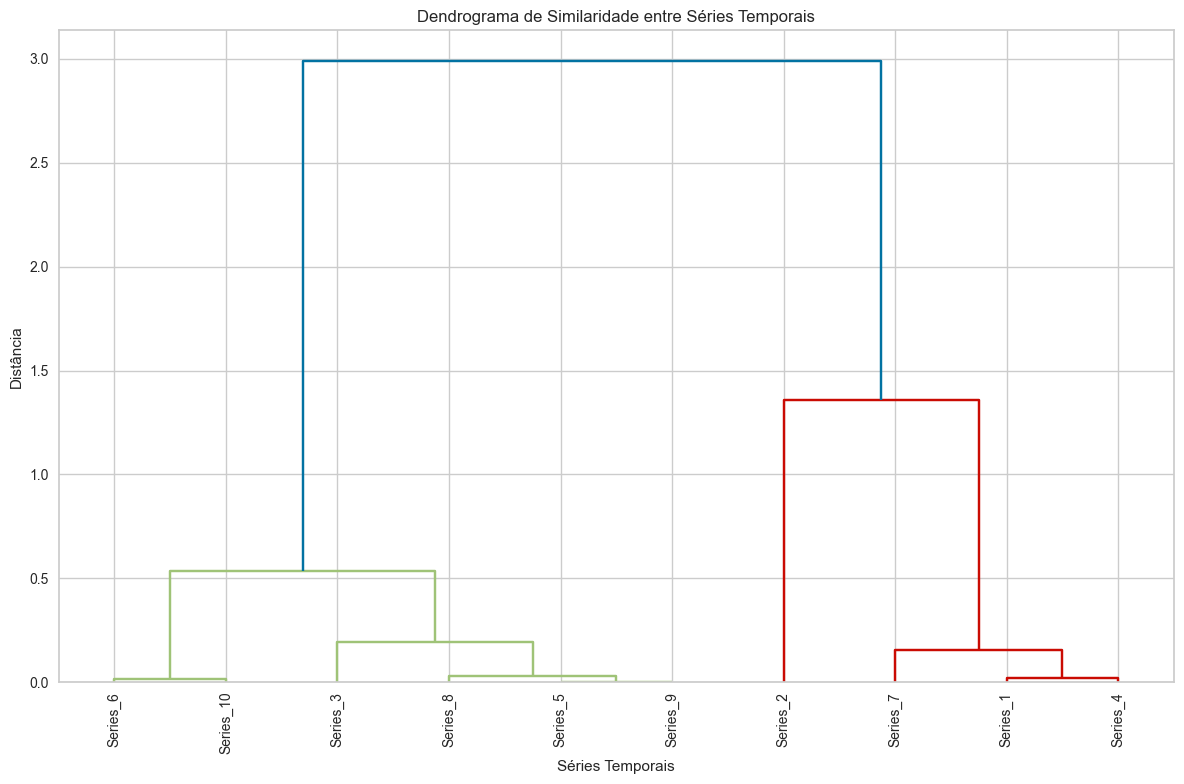

In [36]:
# 1. Gerar dados simulados
np.random.seed(42)
time_steps = 50
n_series = 10

data = pd.DataFrame({
    f"Series_{i+1}": np.sin(np.linspace(0, 2 * np.pi, time_steps) + np.random.uniform(0, 2 * np.pi)) +
    np.random.normal(0, 0.1, time_steps)
    for i in range(n_series)
})
data.index = [f"Time_{i+1}" for i in range(time_steps)]

# 2. Normalizar as s√©ries (z-score)
normalized_data = (data - data.mean()) / data.std()

# 3. Calcular a matriz de similaridade por correla√ß√£o cruzada
similarity_matrix = np.zeros((n_series, n_series))

for i in range(n_series):
    for j in range(n_series):
        if i != j:
            corr = np.correlate(normalized_data.iloc[:, i], normalized_data.iloc[:, j], mode='valid')
            similarity_matrix[i, j] = np.max(corr)
        else:
            similarity_matrix[i, j] = 1  # Similaridade m√°xima para a mesma s√©rie

# 4. Converter a matriz de similaridade em matriz de dist√¢ncia
distance_matrix = 1 - (similarity_matrix / np.max(similarity_matrix))
distance_matrix[distance_matrix < 0] = 0
condensed_distance = distance_matrix[np.triu_indices(n_series, k=1)]

# 5. Aplicar clusteriza√ß√£o hier√°rquica
linkage_matrix = linkage(condensed_distance, method='ward')

# 6. Visualizar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=normalized_data.columns, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma de Similaridade entre S√©ries Temporais")
plt.xlabel("S√©ries Temporais")
plt.ylabel("Dist√¢ncia")
plt.tight_layout()
plt.show()


### Quest√£o 2) Para o problema da quest√£o anterior, indique qual algoritmo de clusteriza√ß√£o voc√™ usaria. Justifique.

> Resposta:
>
> **Algoritmo sugerido:**
> - Clusteriza√ß√£o Hier√°rquica (Hierarchical Clustering)
>
> **Justificativa:**
> - A clusteriza√ß√£o hier√°rquica √© adequada porque pode usar uma matriz de similaridade diretamente, sem a necessidade de transformar os dados em um espa√ßo m√©trico.
> - Permite a visualiza√ß√£o do agrupamento em diferentes n√≠veis atrav√©s de um dendrograma, ajudando na interpreta√ß√£o.
> - √â particularmente √∫til em casos onde o n√∫mero de clusters desejado √© conhecido a priori, como neste caso (3 clusters).

### Quest√£o 3) Indique um caso de uso para essa solu√ß√£o projetada.


> Resposta:
>
> **Caso de uso para a solu√ß√£o projetada:**
> - Agrupamento de sensores de monitoramento ambiental:
>   - Imagine que 10 sensores est√£o monitorando a temperatura em diferentes localidades ao longo do tempo.
>   - A solu√ß√£o pode agrupar sensores com padr√µes de comportamento semelhantes, identificando regi√µes com condi√ß√µes clim√°ticas similares ou padr√µes de varia√ß√£o correlacionados.

### Quest√£o 4) Sugira outra estrat√©gia para medir a similaridade entre s√©ries temporais. Descreva em t√≥picos os passos necess√°rios.

> Resposta:
>
> Outra estrat√©gia para medir a similaridade entre s√©ries temporais:
> - Medi√ß√£o de similaridade por Dist√¢ncia Din√¢mica de Tempo (DTW - Dynamic Time Warping)
>
> **Passos necess√°rios:**
> 1. **Preparar as s√©ries temporais:**
> - Certifique-se de que as s√©ries est√£o normalizadas para evitar influ√™ncia de amplitude.
> 2. **Calcular a dist√¢ncia DTW:**
> - Para cada par de s√©ries, calcule a dist√¢ncia DTW, que mede a similaridade permitindo varia√ß√µes no alinhamento temporal.
> 3. **Criar uma matriz de dist√¢ncia:**
> - Construa uma matriz *n√ón*, onde cada elemento *(i,j)* representa a dist√¢ncia DTW entre as s√©ries 
*i e j*.
> 4. **Aplicar clusteriza√ß√£o:**
> - Utilize a matriz de dist√¢ncia como entrada para algoritmos de clusteriza√ß√£o que aceitem m√©tricas personalizadas (ex.: DBScan ou Clusteriza√ß√£o Hier√°rquica).
> 5. **Validar e interpretar os clusters:**
> - Analise os agrupamentos gerados para verificar se refletem as similaridades esperadas.
> 6. **Visualizar os clusters:**
> - Gere gr√°ficos para mostrar os resultados (dendrogramas, MDS, ou proje√ß√µes t-SNE).


Dados originais (primeiras linhas):
      Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  Sensor_7  \
Time                                                                         
1     0.496714  0.324084 -1.415371  0.250493  0.357787 -1.260884 -0.828995   
2     0.358450 -0.060998 -1.836016  0.596941  0.918572 -0.343022 -1.389176   
3     1.006138 -0.737920 -2.178731 -0.083084  2.001623  1.779134 -0.641882   
4     2.529168 -0.126244 -2.981008  0.149170  3.055425  2.811599 -0.031512   
5     2.295015  0.904756 -3.142294  0.442243  1.677756  1.292229 -0.052414   

      Sensor_8  Sensor_9  Sensor_10  
Time                                 
1     0.310908 -1.594428  -0.062679  
2     1.786264 -2.193803   0.892463  
3     2.643923 -2.188559  -0.093263  
4     2.483985 -2.141578   0.410784  
5     2.464969 -2.591644  -0.119474  

S√©ries normalizadas (primeiras linhas):
      Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  Sensor_7  \
Time                          

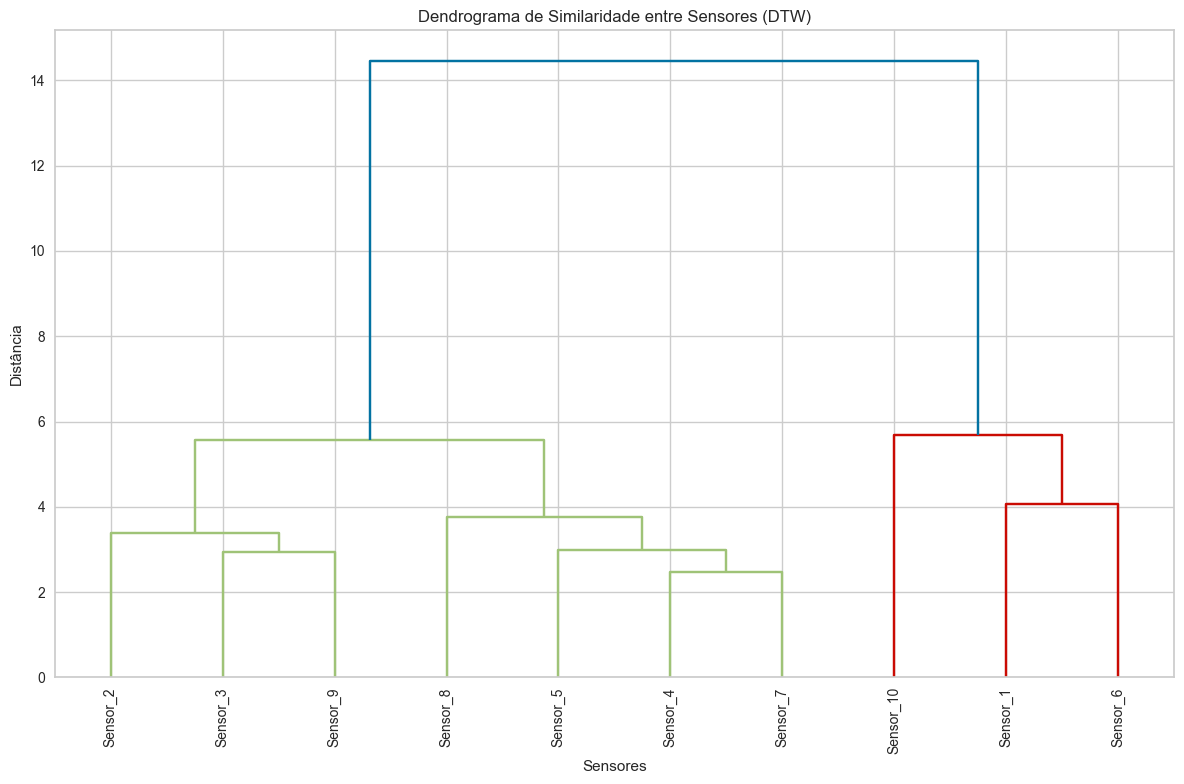

In [37]:
# 1. Gerar um dataset de exemplo para simular s√©ries temporais de sensores
np.random.seed(42)
time_points = 50
num_sensors = 10

# Criar s√©ries temporais sint√©ticas
data = {
    f"Sensor_{i+1}": np.cumsum(np.random.randn(time_points)) for i in range(num_sensors)
}
data['Time'] = range(1, time_points + 1)
df = pd.DataFrame(data)

# Configurar o √≠ndice como o tempo
df.set_index('Time', inplace=True)

# Diagn√≥stico inicial do dataframe
print("\nDados originais (primeiras linhas):")
print(df.head())

# 2. Normalizar as s√©ries temporais por Z-score
normalized = (df - df.mean()) / df.std()

# Verificar se a normaliza√ß√£o foi bem-sucedida
if normalized.isnull().values.any():
    raise ValueError("Os dados normalizados cont√™m valores nulos ou inv√°lidos.")

# Diagn√≥stico das s√©ries normalizadas
print("\nS√©ries normalizadas (primeiras linhas):")
print(normalized.head())

# 3. Calcular a matriz de dist√¢ncia utilizando DTW
n_sensors = normalized.shape[1]
distance_matrix = np.zeros((n_sensors, n_sensors))

for i in range(n_sensors):
    for j in range(n_sensors):
        if i != j:
            # Corrigir acesso √†s colunas com base nos nomes
            distance_matrix[i, j] = dtw.distance(normalized.iloc[:, i].values, normalized.iloc[:, j].values)
        else:
            distance_matrix[i, j] = 0  # Dist√¢ncia de um elemento para si mesmo √© zero

# Diagn√≥stico da matriz de dist√¢ncia
print("\nMatriz de Dist√¢ncia DTW (primeiras linhas):")
print(distance_matrix[:5, :5])

# 4. Transformar a matriz de dist√¢ncia em formato condensado para clusteriza√ß√£o hier√°rquica
condensed_distance = distance_matrix[np.triu_indices(n_sensors, k=1)]

# Diagn√≥stico da matriz condensada
print("\nMatriz de Dist√¢ncia Condensada (tamanho e valores √∫nicos):")
print(f"Tamanho: {len(condensed_distance)}")
print(f"Valores √∫nicos: {np.unique(condensed_distance)}")

# 5. Aplicar clusteriza√ß√£o hier√°rquica
linkage_matrix = linkage(condensed_distance, method='ward')

# 6. Plotar o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=normalized.columns, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma de Similaridade entre Sensores (DTW)")
plt.xlabel("Sensores")
plt.ylabel("Dist√¢ncia")
plt.tight_layout()
plt.show()


--------------------------------------

## Rubricas do trabalho

1. **O aluno escolheu o n√∫mero de clusters para o algoritmo de K-M√©dias usando o √≠ndice de silhueta?**  
   ‚úÖ O n√∫mero de clusters foi determinado usando o √≠ndice de silhueta.  
   **Quest√£o relacionada:** 3.1.

2. **O aluno indicou outras duas medidas de valida√ß√£o para mensurar a qualidade dos modelos?**  
   ‚úÖ Foram usadas as medidas de Davies-Bouldin e Calinski-Harabasz, al√©m do √≠ndice de silhueta.  
   **Quest√£o relacionada:** 3.4.

3. **O aluno comparou os resultados obtidos nos dois modelos?**  
   ‚úÖ Foi comparado os resultados do K-M√©dias e DBScan, destacando semelhan√ßas e diferen√ßas.  
   **Quest√£o relacionada:** 3.3.

4. **O aluno indicou a validade de usar o √≠ndice de silhueta para a clusteriza√ß√£o com DBScan?**  
   ‚úÖ A validade do √≠ndice de silhueta para DBScan foi discutida.  
   **Quest√£o relacionada:** 3.5.

5. **O aluno est√° rodando uma vers√£o atualizada de Python?**  
   ‚úÖ Est√° usando a vers√£o 3.12.4, que √© uma vers√£o atualizada.  
   **Quest√£o relacionada:** 1.1.

6. **O aluno est√° usando ambiente virtual de desenvolvimento?**  
   ‚úÖ Foi confirmado o uso do ambiente virtual `infnet-24E4-3` no Anaconda.  
   **Quest√£o relacionada:** 1.2.

7. **O aluno gerou um arquivo de requerimentos com os pacotes com as respectivas vers√µes?**  
   ‚úÖ Foi gerado um arquivo `requirements.txt` com as depend√™ncias e vers√µes, al√©m de um arquivo `environment.yml`.  
   **Quest√£o relacionada:** 1.4.

8. **O aluno gerou uma prova do ambiente rodando localmente?**  
   ‚úÖ Capturas de tela foram enviadas mostrando o ambiente rodando no Visual Studio Code e no Anaconda Navigator.  
   **Quest√£o relacionada:** 1.5.

9. **O aluno disponibilizou seu trabalho em reposit√≥rio p√∫blico Git (ex. Github)?**  
   ‚úÖ O trabalho est√° dispon√≠vel em um reposit√≥rio p√∫blico no GitHub.  
   **Quest√£o relacionada:** 1.6.

10. **O aluno descreveu em t√≥picos os passos necess√°rios para estabelecer a correla√ß√£o cruzada entre s√©ries temporais como uma medida de similaridade?**  
    ‚úÖ Os passos foram descritos de forma detalhada.  
    **Quest√£o relacionada:** 4.1.

11. **O aluno indicou e justificou o algoritmo de clusteriza√ß√£o que ele escolheria?**  
    ‚úÖ O algoritmo de clusteriza√ß√£o hier√°rquica foi indicado e justificado.  
    **Quest√£o relacionada:** 4.2.

12. **O aluno indicou um caso de uso para a solu√ß√£o projetada?**  
    ‚úÖ O caso de uso apresentado foi o agrupamento de sensores de monitoramento ambiental.  
    **Quest√£o relacionada:** 4.3.

13. **O aluno indicou uma segunda estrat√©gia para determinar a similaridade entre as s√©ries temporais?**  
    ‚úÖ Foi sugerida a Dist√¢ncia Din√¢mica de Tempo (DTW) como uma estrat√©gia alternativa, com passos detalhados.  
    **Quest√£o relacionada:** 4.4.

14. **O aluno escolheu uma base de interesse?**  
    ‚úÖ A base `datasus_suicidio_2014_2018` foi escolhida.  
    **Quest√£o relacionada:** 2.1.

15. **O aluno justificou a escolha da base de interesse?**  
    ‚úÖ A justificativa foi apresentada.
    **Quest√£o relacionada:** 2.2.

16. **O aluno apresentou a faixa din√¢mica para cada uma das dimens√µes da base?**  
    ‚úÖ Foram apresentados gr√°ficos mostrando a faixa din√¢mica das vari√°veis.  
    **Quest√£o relacionada:** 2.3.

17. **O aluno realizou o pr√©-processamento adequado dos dados?**  
    ‚úÖ O pr√©-processamento foi realizado, incluindo renomea√ß√£o de colunas, limpeza de dados e outros passos.  
    **Quest√£o relacionada:** 2.4.

18. **O aluno criou um modelo usando o algoritmo de K-M√©dias?**  
    ‚úÖ Um modelo foi criado com o algoritmo de K-M√©dias.  
    **Quest√£o relacionada:** 3.1.

19. **O aluno soube escolher o n√∫mero √≥timo de clusters para os modelos desenvolvidos?**  
    ‚úÖ O n√∫mero √≥timo de clusters foi determinado para ambos os modelos usando m√©todos de valida√ß√£o, como o √≠ndice de silhueta.  
    **Quest√£o relacionada:** 3.1, 3.2.

20. **O aluno criou um modelo usando o algoritmo de DBScan?**  
    ‚úÖ Um modelo foi criado com o algoritmo DBScan.  
    **Quest√£o relacionada:** 3.1.
